# Trabajo 4 - Grupo 7

**Curso:** INTRODUCCIÓN A CIENCIA DE DATOS Y MACHINE LEARNING CON PYTHON  
**Profesor:** Luis Zapata Bobadilla  

---

## Integrantes
- Cruz Valencia , Carlos Fabrizzio
- Sanchez Miranda , Cristina  
- Rodrigo Farro , Nicolas Alexis
- Velasquez Cabrera , Angelica Velasquez  

---

## Pregunta de investigación
**¿En que medida el crédito directo del sistema financiero al sector privado en Piura impacta en el nivel de exportaciones de la región ?**  



Contexto macroeconómico

* La economía de Piura se caracteriza por un fuerte dinamismo exportador que sostiene una parte importante del crecimiento regional. Este desempeño exportador requiere una base productiva sólida, inversión constante y capacidad de financiar campañas agrícolas, infraestructura, tecnología, sistemas de riego y procesos de certificación para acceder a mercados internacionales. En este contexto, el crédito otorgado por el sistema financiero al sector privado cumple un rol central, ya que provee liquidez y capital de trabajo a empresas que necesitan adaptarse a los ciclos productivos y enfrentar choques externos.

* Los empresarios requieren crédito para preparar terrenos, adquirir insumos, contratar mano de obra temporal o financiar cosechas que solo generan ingresos una vez exportadas. Sin este flujo de capital, la actividad exportadora sería más vulnerable a interrupciones o a variaciones abruptas en los ciclos de producción. Por ello, el crédito no solo impulsa la capacidad productiva, sino que también suaviza las fluctuaciones que afectan a sectores intensivos en capital y dependientes de condiciones climáticas.

* A nivel macroeconómico, las exportaciones regionales también están influenciadas por los movimientos del tipo de cambio. Cuando las condiciones externas son favorables, la demanda por financiamiento suele aumentar porque las empresas buscan expandir volúmenes o mejorar la competitividad. A su vez, en periodos de incertidumbre internacional las empresas dependen aún más del crédito para sostener operaciones y evitar reducciones drásticas en la producción exportable.

* La interacción entre crédito y exportaciones no solo refleja decisiones empresariales, sino también el entorno financiero en el que operan. La disponibilidad de crédito está influenciada por variables como la tasa de referencia del Banco Central de Reserva, que determina el costo del financiamiento en la economía. Estos elementos inciden en la capacidad de los bancos locales para otorgar préstamos y en las decisiones de las empresas para invertir en actividades exportadoras.

* El crédito al sector privado funciona como un motor que permite que sectores estratégicos de Piura se mantengan competitivos, amplíen su capacidad productiva y respondan a los cambios en la demanda internacional. Su importancia dentro de la estructura económica regional hace relevante estudiar cómo evoluciona y qué relación guarda con el desempeño exportador del departamento.

**TRABAJO 1: Ingesta y
Curaduría de Datos**

# **Descripción y construcción de la base de datos**
Para responder a la pregunta de investigación: ¿En qué medida el crédito directo del sistema financiero al sector privado en Piura impacta a nivel de las exportaciones en la región? se construyó una base de datos mensual que combina información financiera, real y macroeconómica para el departamento de Piura.

La base de datos final (df_model_2007_2022) se arma en varias etapas:

Datos de crédito y exportaciones de Piura

A partir del Trabajo 1 se parte de un archivo limpio (df_final_necesario) que ya contiene:
Exportaciones de Piura a nivel departamental (exportaciones_piura).
Crédito total al sector privado en Piura (credito_total_piura).
Estas series provienen de fuentes oficiales del sistema financiero y de estadísticas regionales (BCRP/SBS y fuentes de comercio exterior), y ya fueron depuradas en el primer trabajo (corrección de formatos, eliminación de duplicados y estandarización de la variable fecha).
Variables macro adicionales via API (BCRP y FRED)
Sobre esa base se añadieron tres variables macroeconómicas que ayudan a capturar el entorno en el que operan crédito y exportaciones:

Tasa de referencia del BCRP (tasa_bcrp), descargada con la función get_bcrp_series(...) usando el código de serie mensual del Banco Central.
Tasa de interés de la FED (FEDFUNDS) (tasa_fed), descargada desde la API de la Reserva Federal de St. Louis (FRED) con get_fed_series(...).
Índice de confianza empresarial (confianza_empresarial), obtenido también desde el BCRP (serie PD38045AM).
En todos los casos se trabaja con frecuencia mensual, alineando las fechas al índice de df y reindexando para que cada observación mensual de Piura tenga las tasas y el índice de confianza correspondientes a ese mismo mes.
PBI de Piura (INEI) y por qué empezamos en 2007

Para incorporar una medida del tamaño de la actividad económica regional, se utilizó un archivo del INEI (data PBI piura-necesario 1.xlsx) con el Valor Agregado Bruto / PBI de Piura por año.
En el código se busca explícitamente la fila donde aparece el texto "Valor Agregado Bruto" y, a partir de esa fila, se extraen las columnas numéricas correspondientes a los años 2007–2021. Esto debido a que:
El INEI en ese archivo solo reporta la serie regional de Piura desde 2007 y, en el momento del trabajo, hasta 2021.
Por eso, aunque al inicio teníamos información de crédito y exportaciones desde 2005, al incorporar el PBI la intersección de todas las series queda restringida a partir de 2007.
Con esos datos anuales se construye un DataFrame df_pbi con:
Columna anio (2007–2021).
Columna pbi_piura.
Una columna fecha que fija el 1 de enero de cada año.
Luego se cambia la frecuencia a mensual (MS) usando asfreq("MS") y se aplica forward-fill, de modo que el valor anual del PBI se replica en todos los meses de ese año. Esto es una aproximación estándar cuando solo se dispone de PBI anual y se quiere trabajar a frecuencia mensual.
Construcción del periodo muestral 2007–2021 (y recorte de los extremos)

Una vez que se integran:
Exportaciones de Piura.
Crédito total a Piura.
Tasas de interés (BCRP y FED).
Confianza empresarial.
PBI de Piura (INEI, 2007–2021).
Se observa que:
Antes de 2007, el dataset de crédito y exportaciones sí tiene información, pero no existe PBI de Piura en el archivo del INEI, por lo que se generarían muchos NaN.
Después de 2021, las series financieras (tasas, crédito, exportaciones) pueden seguir, pero el PBI regional deja de estar disponible en ese archivo, lo que vuelve a generar huecos.
Para evitar que el modelo se construya sobre observaciones con datos faltantes o interpolaciones muy arbitrarias, se decide recortar la muestra a un tramo donde todas las variables clave están disponibles de forma consistente.
Por eso, en la sección de curaduría se genera un DataFrame df_model usando:
df_model = df.loc["2007-01-01":"2021-12-01"].copy()
df_model_clean = df_model.dropna()
y a partir de ahí se guarda df_model_2007_2021.csv. En la práctica, el tramo útil donde no hay NaN por PBI y variables macro está centrado en los años 2007–2021, que es el periodo donde convergen las fuentes (crédito, exportaciones, PBI y resto de macro).
Limpieza y construcción de rezagos

Aunque inicialmente se disponía de información de crédito y exportaciones desde 2005, el trabajo no usa toda la historia por tres razones principales:
Restricción de fuente oficial: el INEI recién reporta PBI de Piura en el formato utilizado a partir de 2007, de modo que no es posible construir un modelo con esa variable antes de esa fecha sin inventar o extrapolar datos.
Coherencia entre series: al recortar a 2007–2021 se garantiza que todas las variables del modelo (crédito, exportaciones, PBI, tasas, confianza empresarial) estén presentes y alineadas mensualmente, sin huecos ni interpolaciones agresivas.
Calidad estadística: trabajar con un periodo donde la información es completa reduce el riesgo de sesgos por datos faltantes y hace más transparente la interpretación de los resultados.
En resumen, la base de datos final es el resultado de combinar múltiples fuentes oficiales (INEI para el PBI regional, BCRP para tasas e índices de confianza, FRED para la tasa de la FED y estadísticas financieras/comerciales para crédito y exportaciones de Piura), transformar todo a frecuencia mensual, y recortar el periodo a 2007–2021 (aprox.) para trabajar con un tramo consistente, sin vacíos de información y alineado con la disponibilidad real de datos públicos.

In [54]:
# Librerías para manipulación de datos
import pandas as pd
import numpy as np
import requests
# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import os

# Librerías para modelado y evaluación
from sklearn.model_selection import train_test_split, KFold, cross_val_score, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Statsmodels para inferencia
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Configuraciones generales
plt.style.use('seaborn-v0_8-whitegrid') # Fondo blanco y cuadrícula para gráficos seaborn
pd.set_option('display.float_format', lambda x: f'{x:,.4f}') # Formato para floats
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)
pd.set_option('display.float_format', lambda x: f'{x:,.6f}')

In [55]:
# Carga de datos
# Asegúrate de cargar el dataset limpio y curado del Trabajo 1.
df = pd.read_csv('/content/df_model_2007_2021.csv', parse_dates=['fecha'], index_col='fecha')
# Muestra un vistazo de los datos
df.head()
#muestrame las ultima 5
df.tail()

,tipo_cambio,credito_total_piura,credito_soles_piura,credito_dolares_piura,exportaciones_piura,credito_total_nacional,exportaciones_nacional,ICEN,ICEN_exp,riesgo_pais_embig,tasa_bcrp,tasa_fed,confianza_empresarial,pbi_piura
fecha,,,,,,,,,,,,,,
2020-09-01,3.554909,"8,406.481218","7,429.779837",976.701381,750.277603,"368,689.107564","15,396.366196",-1.020000,0.360595,160.409091,0.250000,0.090000,46.568627,"21,053,137.000000"
2020-10-01,3.595614,"8,530.991254","7,572.616945",958.374309,998.660865,"370,419.373134","16,811.945346",-0.910000,0.402524,150.181818,0.250000,0.090000,50.162866,"21,053,137.000000"
2020-11-01,3.607762,"8,649.949159","7,674.166371",975.782789,"1,185.183733","370,564.805479","15,716.680287",-0.760000,0.467666,147.000000,0.250000,0.090000,52.805281,"21,053,137.000000"
2020-12-01,3.602619,"8,630.482998","7,662.559307",967.923691,"1,327.106565","369,826.103161","18,113.536275",-0.790000,0.453845,144.097826,0.250000,0.090000,49.500000,"21,053,137.000000"
2021-01-01,3.624575,"8,609.384050","7,620.592458",988.791592,999.211770,"367,924.318420","16,340.973425",-0.840000,0.431711,141.098913,0.250000,0.090000,41.176471,"21,253,698.000000"


**Gráficos**

A partir de la data descargada y procesada, se elaborarán diversos gráficos descriptivos con el fin de visualizar la dinámica temporal de las principales variables económicas del estudio. Estos gráficos permiten identificar patrones, tendencias, ciclos estacionales y posibles relaciones preliminares entre el crédito y las exportaciones, así como entre las demás variables macroeconómicas incluidas. La representación visual facilita una comprensión más intuitiva del comportamiento de las series y sirve como punto de partida para interpretar la evolución económica de Piura antes de realizar cualquier estimación econométrica o modelo predictivo.

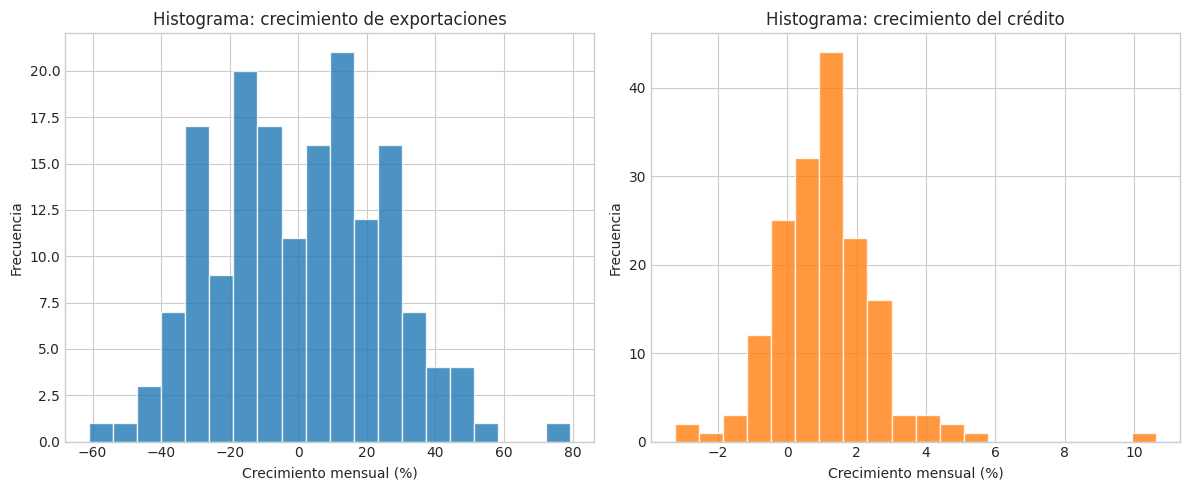

In [56]:
# ============================================================
# GRÁFICOS RESUMEN – TRABAJO CRÉDITO Y EXPORTACIONES
# ============================================================

#Ajusta este código
# 0) Asegurar variables de crecimiento (si no existen)
df_plot = df.copy()

if "crec_exportaciones" not in df_plot.columns:
    df_plot["log_exportaciones"] = np.log(df_plot["exportaciones_piura"])
    df_plot["crec_exportaciones"] = df_plot["log_exportaciones"].diff() * 100

if "crec_credito" not in df_plot.columns:
    df_plot["log_credito"] = np.log(df_plot["credito_total_piura"])
    df_plot["crec_credito"] = df_plot["log_credito"].diff() * 100

# Limpiar filas con NaN al inicio de las diferencias
df_plot = df_plot.dropna(subset=["crec_exportaciones", "crec_credito"])


# ------------------------------------------------------------
# 1) HISTOGRAMAS – Distribución de los crecimientos
# ------------------------------------------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df_plot["crec_exportaciones"], bins=20, alpha=0.8)
plt.title("Histograma: crecimiento de exportaciones")
plt.xlabel("Crecimiento mensual (%)")
plt.ylabel("Frecuencia")

plt.subplot(1,2,2)
plt.hist(df_plot["crec_credito"], bins=20, alpha=0.8, color="tab:orange")
plt.title("Histograma: crecimiento del crédito")
plt.xlabel("Crecimiento mensual (%)")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


Interpretación

Los histogramas muestran la distribución estadística de ambas variables y son el primer paso para entender su comportamiento económico. El crecimiento de las exportaciones presenta una distribución muy dispersa y con colas largas, evidenciando una alta volatilidad típica de sectores dependientes de shocks externos, estacionalidad productiva y variaciones en precios internacionales. En contraste, el crecimiento del crédito es mucho más concentrado alrededor de valores moderados, lo que refleja la estabilidad del sistema financiero y las decisiones de oferta de crédito del sector bancario, que suelen ajustarse suavemente en el tiempo. Estos histogramas muestran que crédito y exportaciones operan en escalas de variabilidad muy diferentes, lo que anticipa por qué su relación directa puede ser débil o difícil de capturar en modelos lineales.

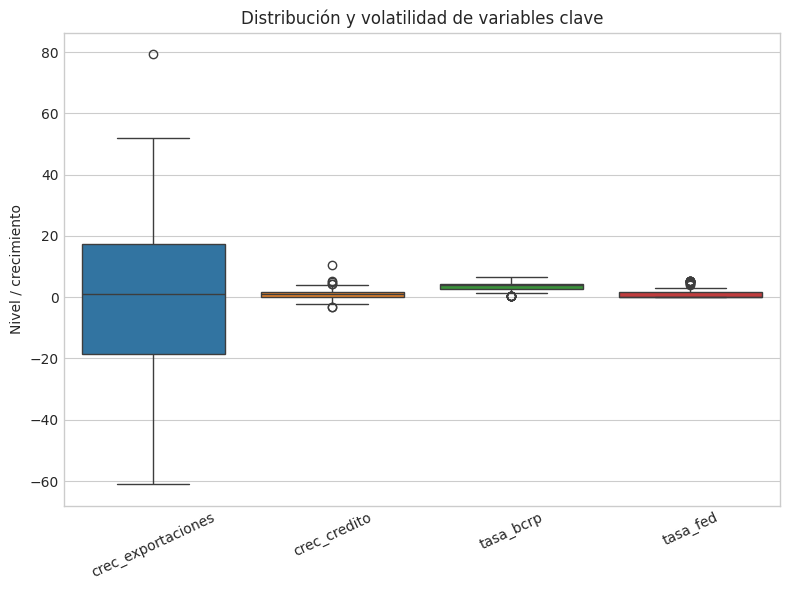

In [57]:
# ------------------------------------------------------------
# 2) BOXPLOT – Volatilidad de crecimiento y tasas
# ------------------------------------------------------------
vars_box = ["crec_exportaciones", "crec_credito", "tasa_bcrp", "tasa_fed"]
df_box = df_plot[vars_box].copy()

plt.figure(figsize=(8,6))
sns.boxplot(data=df_box)
plt.title("Distribución y volatilidad de variables clave")
plt.xticks(rotation=25)
plt.ylabel("Nivel / crecimiento")
plt.tight_layout()
plt.show()

Interpretación

El boxplot refuerza la lectura anterior al evidenciar la magnitud relativa de la volatilidad. El crecimiento de las exportaciones muestra un rango intercuartílico enorme y múltiples valores atípicos, lo que confirma episodios de fuertes caídas o picos asociados a choques externos. Por el contrario, el crédito y las tasas de interés (BCRP y FED) presentan cajas muy compactas y casi sin outliers, señal de que estas variables cambian con gradualidad y responden más a la política monetaria que a shocks súbitos. Este gráfico aporta algo nuevo: muestra explícitamente la inestabilidad extrema del sector exportador frente al comportamiento suave del crédito, lo que explica por qué la transmisión crédito hacia las exportaciones puede ser lenta, parcial o estadísticamente débil.

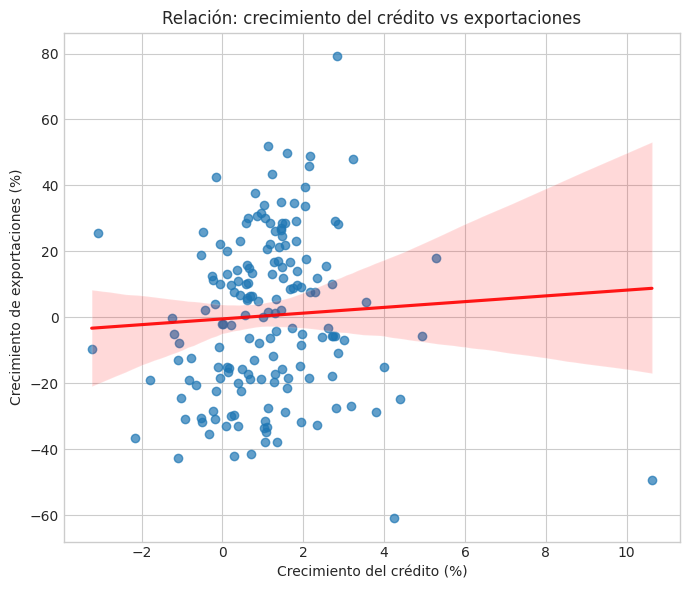

In [58]:
# ------------------------------------------------------------
# 3) SCATTERPLOT – Crédito vs exportaciones (crecimientos)
# ------------------------------------------------------------
plt.figure(figsize=(7,6))
sns.regplot(
    x=df_plot["crec_credito"],
    y=df_plot["crec_exportaciones"],
    scatter_kws={"alpha":0.7},
    line_kws={"color":"red", "alpha":0.9}
)
plt.title("Relación: crecimiento del crédito vs exportaciones")
plt.xlabel("Crecimiento del crédito (%)")
plt.ylabel("Crecimiento de exportaciones (%)")
plt.tight_layout()
plt.show()

Interpretación:

El scatterplot revela la fuerza y la dirección de la relación entre ambas variables. Visualmente, los puntos están muy dispersos y la nube no muestra un patrón claro, lo cual indica una correlación baja. La línea de tendencia ligeramente positiva sugiere que, en promedio, meses con mayor crecimiento del crédito están asociados a leves mejoras en las exportaciones, pero esta relación es débil y altamente ruidosa. Este gráfico aporta lo que los anteriores no capturaban: la evidencia empírica directa de que el crédito no explica bien las variaciones mensuales del comercio exterior, probablemente porque las exportaciones responden más a demanda externa, precios de commodities y shocks climáticos.

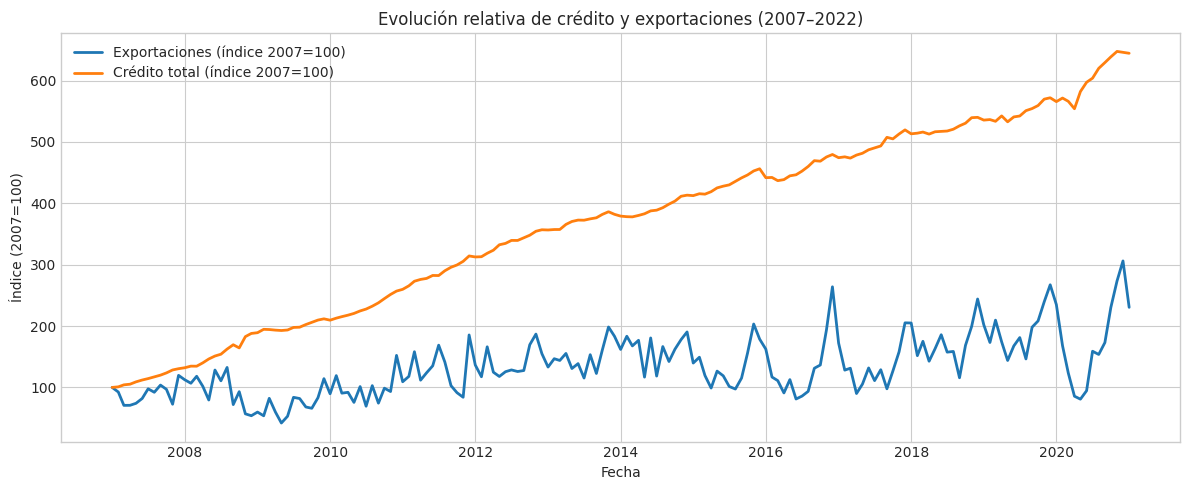

In [59]:
# ------------------------------------------------------------
# 4) LINEPLOT – Dinámica temporal (índice 2007=100)
# ------------------------------------------------------------
df_idx = df[["exportaciones_piura", "credito_total_piura"]].copy()
# Índice base = 100 en primer dato
df_idx = df_idx / df_idx.iloc[0] * 100

plt.figure(figsize=(12,5))
plt.plot(df_idx.index, df_idx["exportaciones_piura"], label="Exportaciones (índice 2007=100)", linewidth=2)
plt.plot(df_idx.index, df_idx["credito_total_piura"], label="Crédito total (índice 2007=100)", linewidth=2)
plt.title("Evolución relativa de crédito y exportaciones (2007–2022)")
plt.xlabel("Fecha")
plt.ylabel("Índice (2007=100)")
plt.legend()
plt.tight_layout()
plt.show()

Interpretación

Este gráfico permite comparar la trayectoria histórica de ambas variables en la misma escala. El crédito total muestra una tendencia estructural creciente y sostenida entre 2007 y 2022, reflejando la expansión financiera y la inclusión crediticia. En cambio, las exportaciones fluctúan alrededor de una trayectoria plana con picos esporádicos, lo que deja claro que el crédito crece sistemáticamente mientras que las exportaciones no lo hacen en la misma magnitud. Este gráfico revela algo nuevo: la desconexión entre tendencia del crédito y tendencia de las exportaciones, reforzando la idea de que la relación entre ambas es contemporánea pero no estructural.

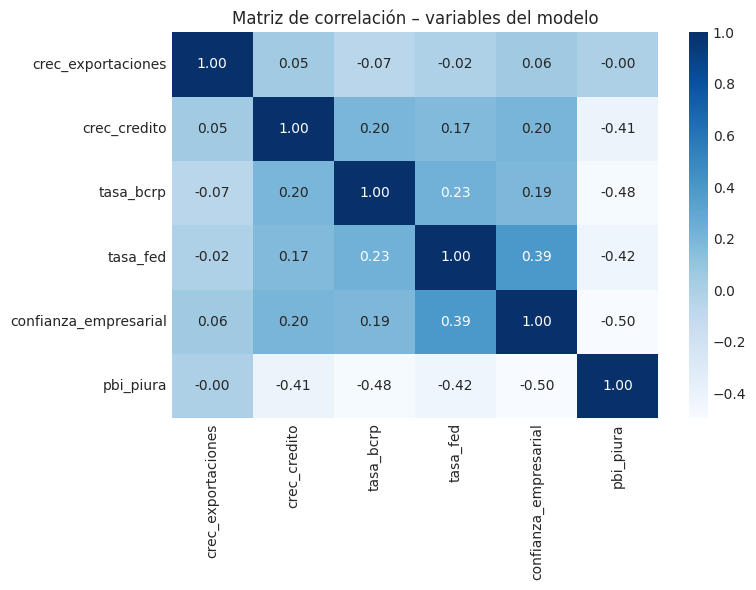

In [60]:
# ------------------------------------------------------------
# 5) HEATMAP – Correlaciones entre variables económicas
# ------------------------------------------------------------
vars_corr = [
    "crec_exportaciones", "crec_credito",
    "tasa_bcrp", "tasa_fed", "confianza_empresarial", "pbi_piura"
]
vars_corr = [v for v in vars_corr if v in df_plot.columns]

plt.figure(figsize=(8,6))
sns.heatmap(df_plot[vars_corr].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Matriz de correlación – variables del modelo")
plt.tight_layout()
plt.show()



Interpretación

El heatmap sintetiza cuantitativamente las relaciones entre las variables. La correlación entre crec_credito y crec_exportaciones es cercana a 0, lo que confirma estadísticamente lo observado en el scatterplot. Además, se identifican correlaciones moderadas y negativas entre crec_exportaciones y variables como pbi_piura o confianza empresarial, lo que sugiere que la dinámica exportadora puede estar influida por otros factores estructurales y ciclos económicos internos. Este gráfico aporta evidencia resumida y formal: la relación crédito–exportaciones es estadísticamente débil y no lineal, mientras que otros determinantes macroeconómicos muestran correlaciones consistentes entre sí.

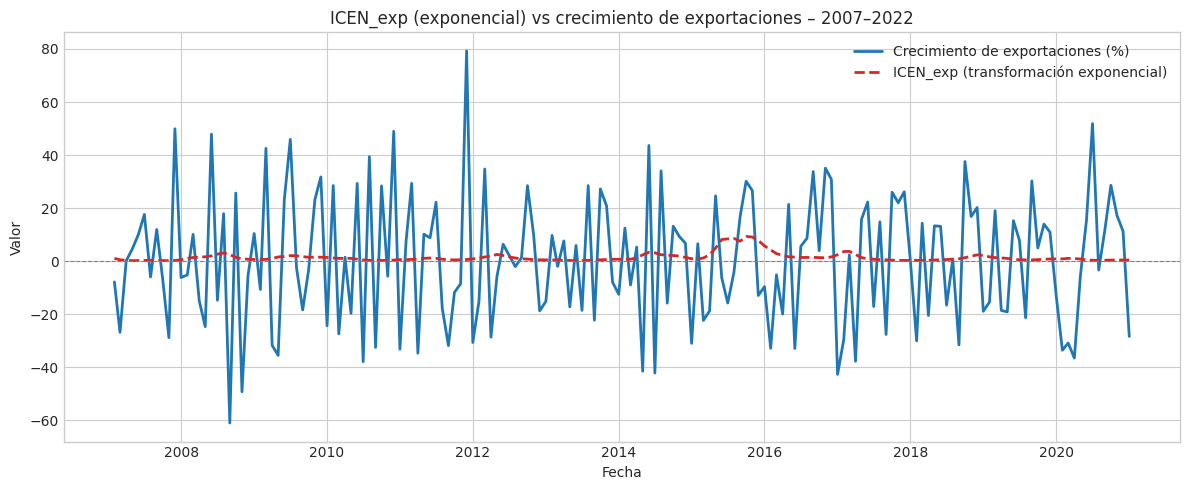

In [61]:
# Gráfico
plt.figure(figsize=(12,5))

plt.plot(
    df_plot.index,
    df_plot["crec_exportaciones"],
    label="Crecimiento de exportaciones (%)",
    linewidth=2,
    color="tab:blue"
)

plt.plot(
    df_plot.index,
    df_plot["ICEN_exp"],
    label="ICEN_exp (transformación exponencial)",
    linewidth=2,
    linestyle="--",
    color="tab:red"
)

plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)

plt.title("ICEN_exp (exponencial) vs crecimiento de exportaciones – 2007–2022")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.legend()
plt.tight_layout()
plt.show()

El crecimiento de las exportaciones de Piura (línea azul) es altamente volátil, con subidas y caídas fuertes mes a mes, mientras que el ICEN_exp (línea roja) (que refleja la intensidad del Niño Costero en forma suavizada) se mantiene casi plano y con variaciones muy pequeñas durante todo el periodo. Al comparar ambas líneas no se aprecia un patrón claro: los picos y caídas de las exportaciones no coinciden de forma consistente con los movimientos del ICEN_exp, ni siquiera en años de eventos fuertes como 2017. Esto sugiere que, visualmente, el Niño Costero no parece tener un efecto directo, inmediato o generalizado sobre el crecimiento exportador mensual, sino que su impacto podría ser específico por sectores, operar con rezagos o quedar opacado por otros factores como precios internacionales, demanda externa o estacionalidad agrícola.

# **TRABAJO 2: Modelado Lineal Supervisado, Validación y Comparación de  Modelos**

**Construcción de variables objetivo y regresores principales**

En este paso construyo la variable objetivo del modelo, definida como el crecimiento mensual de las exportaciones de Piura, usando diferencias logarítmicas para estabilizar la varianza. Luego genero la variable explicativa principal del trabajo, el crecimiento del crédito al sector privado rezagado un mes, que es la única variable X del modelo simple.

In [62]:
# ============================================================
# 2. FEATURE ENGINEERING
# ============================================================

# Asegurarnos de que existen las columnas básicas
cols_necesarias = ["exportaciones_piura", "credito_total_piura"]
for c in cols_necesarias:
    if c not in df.columns:
        raise ValueError(f"Falta la columna '{c}' en df_model_2007_2021.csv")

# Logs para estabilizar la varianza
df["log_exportaciones"] = np.log(df["exportaciones_piura"])
df["log_credito_piura"] = np.log(df["credito_total_piura"])

# Crecimientos mensuales (en %)
df["crec_exportaciones"] = df["log_exportaciones"].diff() * 100
df["crec_credito"] = df["log_credito_piura"].diff() * 100

# Rezagos relevantes (1 periodo)
df["crec_export_lag1"] = df["crec_exportaciones"].shift(1)
df["crec_credito_lag1"] = df["crec_credito"].shift(1)

# Opcional: puedes mirar rápidamente la serie objetivo
print("\nResumen de la variable objetivo (crec_exportaciones):")
print(df["crec_exportaciones"].describe())


Resumen de la variable objetivo (crec_exportaciones):
count   168.000000
mean      0.497040
std      24.393807
min     -60.987807
25%     -18.535418
50%       1.001594
75%      17.250632
max      79.262217
Name: crec_exportaciones, dtype: float64


In [63]:
# ============================================================
# 3. DEFINIR DATA LIMPIA
# ============================================================

df_ml = df.copy()
df_ml = df_ml.dropna(subset=["crec_exportaciones", "crec_credito_lag1"])

print("\nObservaciones útiles para ML tras dropna(target & crec_credito_lag1):", len(df_ml))


Observaciones útiles para ML tras dropna(target & crec_credito_lag1): 167


**División temporal Train/Test (75% – 25%)**

Realizo la separación temporal del dataset, usando el 75% inicial para entrenamiento y el 25% final para prueba. Esta división respeta la estructura cronológica y evita filtrar información futura en el entrenamiento.

In [64]:
# ============================================================
# 4. TRAIN / TEST SPLIT (último 25% como test)
# ============================================================

n = len(df_ml)
split_idx = int(np.floor(n * 0.75))

train = df_ml.iloc[:split_idx].copy()
test  = df_ml.iloc[split_idx:].copy()

print("\nSplit temporal:")
print("Train:", train.index.min().date(), "→", train.index.max().date(), "| n =", len(train))
print("Test :", test.index.min().date(), "→", test.index.max().date(), "| n =", len(test))

# Variables objetivo
y_train = train["crec_exportaciones"]
y_test  = test["crec_exportaciones"]



Split temporal:
Train: 2007-03-01 → 2017-07-01 | n = 125
Test : 2017-08-01 → 2021-01-01 | n = 42


**Baseline**

Antes de los modelos OLS, construyo un baseline que predice siempre la media del crecimiento de exportaciones del conjunto de entrenamiento. Esto sirve como nivel mínimo de desempeño para comparar si los modelos OLS realmente aportan valor.

In [65]:
# ============================================================
# 6. BASELINE INGENUO
# ============================================================

mean_baseline = y_train.mean()
baseline_preds_test = np.repeat(mean_baseline, len(y_test))
baseline_mse_test = mean_squared_error(y_test, baseline_preds_test)

print(f"\nBaseline (media train) = {mean_baseline:.6f}")
print(f"Baseline MSE (test)    = {baseline_mse_test:.6f}")


Baseline (media train) = 0.146431
Baseline MSE (test)    = 487.454327


**Definición de variables**

In [66]:
# ============================================================
# 5. DEFINIR FEATURES: MODELO SIMPLE Y COMPLEJO
# ============================================================

# Modelo simple: impacto del crecimiento del crédito (t-1) sobre
# el crecimiento de las exportaciones en t
features_simple = ["crec_credito_lag1"]

# Modelo complejo: mantiene la lógica del simple y añade:
# - crec_credito contemporáneo
# - rezago del propio crecimiento de exportaciones
# - PBI de Piura
# - tasas de interés (BCRP, FED)
# - confianza empresarial
features_complex = [
    "crec_credito_lag1",
    "crec_credito",
    "crec_export_lag1",
    "pbi_piura",
    "tasa_bcrp",
    "tasa_fed",
    "confianza_empresarial",
    "ICEN_exp"
]

# Filtrar solo las columnas que sí existen en el DataFrame
features_simple = [f for f in features_simple if f in train.columns]
features_complex = [f for f in features_complex if f in train.columns]

print("\nFeatures modelo simple:", features_simple)
print("Features modelo complejo (existentes):", features_complex)


Features modelo simple: ['crec_credito_lag1']
Features modelo complejo (existentes): ['crec_credito_lag1', 'crec_credito', 'crec_export_lag1', 'pbi_piura', 'tasa_bcrp', 'tasa_fed', 'confianza_empresarial', 'ICEN_exp']


**Modelo OLS simple**

Estimo el modelo OLS simple empleando directamente las variables X y Y. Utilizo statsmodels con errores robustos HAC (Newey–West) para corregir autocorrelación y heterocedasticidad, y reporto métricas como MSE y R² en el conjunto de prueba.


In [67]:
# OLS simple: crec_exportaciones vs crec_credito_lag1

X_train_simple = train[features_simple].copy()
X_test_simple  = test[features_simple].copy()

# Re-obtain y_train and y_test as pandas Series to ensure proper alignment
y_train_ols = train["crec_exportaciones"]
y_test_ols = test["crec_exportaciones"]

# Alinear índices de X e Y (evita el error de indices)
X_train_simple_clean, y_train_simple_clean = X_train_simple.align(
    y_train_ols, join="inner", axis=0
)

print("Obs usadas en OLS simple (train):", len(X_train_simple_clean))

X_train_sm = sm.add_constant(X_train_simple_clean)
model_ols_simple = sm.OLS(y_train_simple_clean, X_train_sm).fit(
    cov_type="HAC",
    cov_kwds={"maxlags": 5}
)

print("\nOLS simple: crec_exportaciones ~ crec_credito_lag1")
print(model_ols_simple.summary())

# residuos
resid_s = model_ols_simple.resid
print("Durbin–Watson (simple):", durbin_watson(resid_s))
bp_s = het_breuschpagan(resid_s, model_ols_simple.model.exog)
print("Breusch–Pagan p-value (simple):", bp_s[1])

# predicción sobre el bloque test
X_test_simple_clean, y_test_simple_clean = X_test_simple.align(
    y_test_ols, join="inner", axis=0
)
X_test_sm = sm.add_constant(X_test_simple_clean)
preds_simple_test = model_ols_simple.predict(X_test_sm)

mse_simple_test = mean_squared_error(y_test_simple_clean, preds_simple_test)
print(f"\nMSE test OLS simple (n={len(X_test_simple_clean)}): {mse_simple_test:.6f}")

Obs usadas en OLS simple (train): 125

OLS simple: crec_exportaciones ~ crec_credito_lag1
                            OLS Regression Results                            
Dep. Variable:     crec_exportaciones   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.715
Date:                Sat, 29 Nov 2025   Prob (F-statistic):              0.102
Time:                        12:29:08   Log-Likelihood:                -579.56
No. Observations:                 125   AIC:                             1163.
Df Residuals:                     123   BIC:                             1169.
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

**Estimación modelo OLS Complejo**

Estimo el modelo complejo incluyendo variables macroeconómicas y rezagos adicionales. Aquí también aplico errores HAC y calculo métricas de desempeño.


In [68]:
# ============================================================
# OLS COMPLEJO: crédito + controles + ICEN_exp
# ============================================================

mse_complex_test = np.nan
r2_complex_test  = np.nan
model_ols_complex = None

if len(features_complex) > 0:
    # X e y para el modelo complejo (solo train)
    X_train_complex = train[features_complex].copy()
    y_train_complex = train["crec_exportaciones"].copy()

    # filtro filas con datos completos
    X_train_complex = X_train_complex.replace([np.inf, -np.inf], np.nan)
    mask_train_c = X_train_complex.notna().all(axis=1) & y_train_complex.notna()

    X_train_c = X_train_complex.loc[mask_train_c]
    y_train_c = y_train_complex.loc[mask_train_c]

    print("Filas usadas en OLS complejo (train):", len(X_train_c))

    if len(X_train_c) < 10:
        print("Ojo: pocas observaciones para el modelo complejo.")

    # estimar OLS con errores HAC
    X_train_sm_c = sm.add_constant(X_train_c)
    model_ols_complex = sm.OLS(y_train_c, X_train_sm_c).fit(
        cov_type="HAC",
        cov_kwds={"maxlags": 3}
    )

    print("\nOLS complejo: crec_exportaciones ~ crédito + controles + ICEN_exp")
    print(model_ols_complex.summary())

    # diagnósticos
    resid_c = model_ols_complex.resid
    print("Durbin–Watson (complejo):", durbin_watson(resid_c))
    bp_c = het_breuschpagan(resid_c, model_ols_complex.model.exog)
    print("Breusch–Pagan p-value (complejo):", bp_c[1])

    # ---------- PREDICCIÓN EN TEST ----------
    X_test_complex = test[features_complex].copy()
    y_test_complex = test["crec_exportaciones"].copy()

    X_test_complex = X_test_complex.replace([np.inf, -np.inf], np.nan)
    mask_test_c = X_test_complex.notna().all(axis=1) & y_test_complex.notna()

    X_test_c = X_test_complex.loc[mask_test_c]
    y_test_c = y_test_complex.loc[mask_test_c]

    print("Filas válidas en TEST (complejo):", len(X_test_c))

    if len(X_test_c) > 0:
        X_test_sm_c = sm.add_constant(X_test_c)
        preds_complex_test = model_ols_complex.predict(X_test_sm_c)

        mse_complex_test = mean_squared_error(y_test_c, preds_complex_test)
        r2_complex_test  = r2_score(y_test_c, preds_complex_test)

        print(f"\nMSE test OLS complejo: {mse_complex_test:.6f}")
        print(f"R² test OLS complejo : {r2_complex_test:.6f}")


Filas usadas en OLS complejo (train): 125

OLS complejo: crec_exportaciones ~ crédito + controles + ICEN_exp
                            OLS Regression Results                            
Dep. Variable:     crec_exportaciones   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     4.131
Date:                Sat, 29 Nov 2025   Prob (F-statistic):           0.000229
Time:                        12:29:08   Log-Likelihood:                -569.11
No. Observations:                 125   AIC:                             1156.
Df Residuals:                     116   BIC:                             1182.
Df Model:                           8                                         
Covariance Type:                  HAC                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------

**Validación cruzada temporal**

Utilizo validación cruzada especializada para series de tiempo (TimeSeriesSplit) para medir la estabilidad y capacidad predictiva de los modelos dentro del conjunto de entrenamiento

In [69]:
tscv = TimeSeriesSplit(n_splits=5)
lr = LinearRegression()

def cv_mse_time_series(model, X_df, y_series, tscv_obj):
    """
    Calcula el MSE de validación cruzada en series de tiempo.
    - Aplico forward-fill en X para no perder tantas filas.
    - scoring = neg_mean_squared_error → se multiplica por -1.
    """
    # Apply ffill and then drop any remaining NaNs (e.g., at the very start of the series)
    X_cleaned = X_df.fillna(method="ffill").dropna()
    y_cleaned = y_series.loc[X_cleaned.index] # Align y with the cleaned X

    X = X_cleaned.values
    y = y_cleaned.values

    scores = -cross_val_score(
        model,
        X,
        y,
        cv=tscv_obj,
        scoring="neg_mean_squared_error"
    )
    return scores

# CV para el modelo simple
scores_simple = cv_mse_time_series(
    lr,
    X_train_simple_clean,
    y_train_simple_clean,
    tscv
)

# CV para el modelo complejo
scores_complex = np.array([np.nan])
if model_ols_complex is not None:
    # Use X_train_c and y_train_c which were defined in the previous cell for the complex model
    scores_complex = cv_mse_time_series(
        lr,
        X_train_c, # Corrected variable name
        y_train_c, # Corrected variable name
        tscv
    )

print("\nCV (TimeSeriesSplit) – MSE por fold")
print("Simple  - folds MSE:", np.round(scores_simple, 6))
print("Simple  - mean ± sd:", np.round(scores_simple.mean(), 6),
      "±", np.round(scores_simple.std(), 6))

if not np.isnan(scores_complex).all():
    print("Complejo - folds MSE:", np.round(scores_complex, 6))
    print("Complejo - mean ± sd:", np.round(scores_complex.mean(), 6),
          "±", np.round(scores_complex.std(), 6))


CV (TimeSeriesSplit) – MSE por fold
Simple  - folds MSE: [785.460023 881.067859 272.186954 587.190408 574.184666]
Simple  - mean ± sd: 620.017982 ± 209.610531
Complejo - folds MSE: [2083.358782  909.493056  255.853581  474.806492  748.056883]
Complejo - mean ± sd: 894.313759 ± 635.463185


**Tabla comparativa**

Construyo una tabla que resume las métricas de los modelos (MSE en test, R² en test y MSE promedio en validación cruzada). Esta tabla permite comparar directamente cuál modelo predice mejor.

In [70]:
# ============================================================
# 10. TABLA COMPARATIVA FINAL (Baseline vs OLS simple vs complejo)
# ============================================================

comparison = pd.DataFrame({
    "Modelo": ["Baseline (media)",
               "OLS Simple (crec_credito_lag1)",
               "OLS Complejo"],
    "MSE_test": [
        baseline_mse_test,
        mse_simple_test,
        mse_complex_test
    ],
    "R2_test": [
        np.nan,
        r2_score(y_test_simple_clean, preds_simple_test),
        r2_complex_test
    ],
    "MSE_CV_train_mean": [
        np.nan,
        scores_simple.mean(),
        (scores_complex.mean() if not np.isnan(scores_complex).all() else np.nan)
    ],
    "MSE_CV_train_sd": [
        np.nan,
        scores_simple.std(),
        (scores_complex.std() if not np.isnan(scores_complex).all() else np.nan)
    ]
})

comparison.set_index("Modelo", inplace=True)

print("\n===== TABLA COMPARATIVA DE MODELOS =====")
print(comparison)

comparison.to_csv("comparison_models_credito_exportaciones.csv")
print("\nResultados guardados en 'comparison_models_credito_exportaciones.csv'")



===== TABLA COMPARATIVA DE MODELOS =====
                                 MSE_test  R2_test  MSE_CV_train_mean  \
Modelo                                                                  
Baseline (media)               487.454327      NaN                NaN   
OLS Simple (crec_credito_lag1) 448.855984 0.074371         620.017982   
OLS Complejo                   479.941419 0.010267         894.313759   

                                MSE_CV_train_sd  
Modelo                                           
Baseline (media)                            NaN  
OLS Simple (crec_credito_lag1)       209.610531  
OLS Complejo                         635.463185  

Resultados guardados en 'comparison_models_credito_exportaciones.csv'


**Reentreno modelo con mejores resultados**

Selecciono el mejor modelo según los resultados (generalmente el modelo simple), lo reentreno con todo el conjunto de entrenamiento y genero sus predicciones finales para el test

In [71]:
# ============================================================
# 11. Mejor modelo según análisis
# ============================================================

print("\n===== REENTRENAMIENTO FINAL: OLS SIMPLE =====")

features_final = features_simple
X_train_final = train[features_final].dropna().copy()
y_train_final = train.loc[X_train_final.index, "crec_exportaciones"]

X_train_sm_final = sm.add_constant(X_train_final)
best_model = sm.OLS(y_train_final, X_train_sm_final).fit(
    cov_type='HAC',
    cov_kwds={'maxlags': 5}
)

# Evaluar en TEST
X_test_final = test[features_final].copy()
mask_test_final = X_test_final.notna().all(axis=1)
X_test_final_clean = X_test_final.loc[mask_test_final]
y_test_final = test.loc[mask_test_final, "crec_exportaciones"]

X_test_sm_final = sm.add_constant(X_test_final_clean)
final_predictions = best_model.predict(X_test_sm_final)

final_mse = mean_squared_error(y_test_final, final_predictions)
final_r2 = r2_score(y_test_final, final_predictions)

print("\n===== Evaluación final del modelo de regresión =====")
print(f"MSE en Test: {final_mse:,.6f}")
print(f"R² en Test : {final_r2:,.6f}")

print("\nResumen del modelo final:")
print(best_model.summary())

# predicciones finales
results_final = pd.DataFrame({
    "fecha": y_test_final.index,
    "crec_export_real": y_test_final.values,
    "crec_export_pred": final_predictions.values
}).set_index("fecha")

results_final.to_csv("final_model_predictions_credito_exportaciones.csv")
print("Predicciones finales guardadas en 'final_model_predictions_credito_exportaciones.csv'")


===== REENTRENAMIENTO FINAL: OLS SIMPLE =====

===== Evaluación final del modelo de regresión =====
MSE en Test: 448.855984
R² en Test : 0.074371

Resumen del modelo final:
                            OLS Regression Results                            
Dep. Variable:     crec_exportaciones   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.715
Date:                Sat, 29 Nov 2025   Prob (F-statistic):              0.102
Time:                        12:29:08   Log-Likelihood:                -579.56
No. Observations:                 125   AIC:                             1163.
Df Residuals:                     123   BIC:                             1169.
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                        coef    std 

**Gráfico real vs predicho en el período de prueba**

Un gráfico comparando el comportamiento de la serie real del crecimiento de exportaciones con las predicciones generadas por cada modelo en el conjunto de prueba.

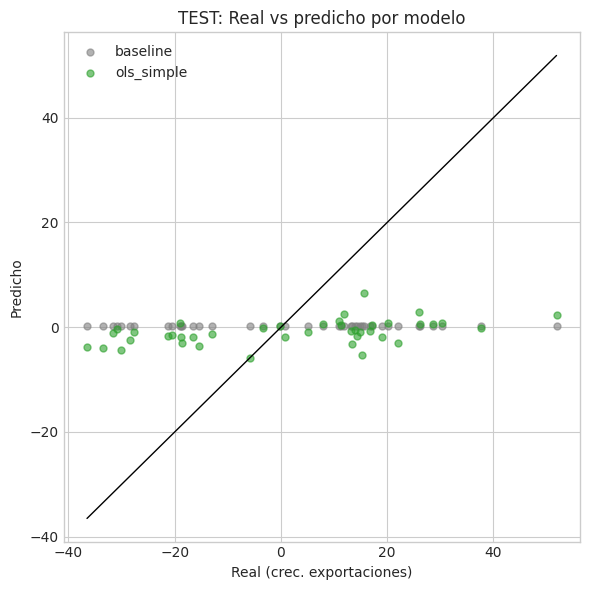

In [72]:
# ------------------------------------------
# 1) Armamos df_preds
# ------------------------------------------
df_preds = pd.DataFrame(index=y_test.index)
df_preds["real"] = y_test.values
df_preds["baseline"] = baseline_preds_test

df_preds.loc[y_test_simple_clean.index, "ols_simple"] = preds_simple_test.values

if "model_ols_complex" in globals() and (model_ols_complex is not None):
    if "y_test_complex_clean" in globals():
        df_preds.loc[y_test_complex_clean.index, "ols_complejo"] = preds_complex_test.values

# ------------------------------------------
# 2) Scatter Real vs Predicho
# ------------------------------------------
plt.figure(figsize=(6,6))

modelos = {
    "baseline": "gray",
    "ols_simple": "tab:green",
    "ols_complejo": "tab:red"
}

for nombre, color in modelos.items():
    if nombre in df_preds.columns:
        m = df_preds[nombre].notna()
        if m.sum() > 0:
            plt.scatter(
                df_preds.loc[m, "real"],
                df_preds.loc[m, nombre],
                s=25,
                alpha=0.6,
                label=nombre,
                color=color
            )

mini = df_preds[["real"] + [c for c in modelos.keys() if c in df_preds.columns]].min().min()
maxi = df_preds[["real"] + [c for c in modelos.keys() if c in df_preds.columns]].max().max()

plt.plot([mini, maxi], [mini, maxi], color="black", linewidth=1)

plt.xlabel("Real (crec. exportaciones)")
plt.ylabel("Predicho")
plt.title("TEST: Real vs predicho por modelo")
plt.legend()
plt.tight_layout()
plt.show()

Elegimos el rezago de un mes del crédito porque, desde el inicio, asumimos que el financiamiento podría trasladarse rápido a la actividad exportadora. En sectores como agroindustria o pesca —que operan con ciclos cortos y altos requerimientos de capital de trabajo— es razonable pensar que un aumento del crédito en el mes previo se utilice casi de inmediato para comprar insumos, financiar producción o cubrir costos logísticos asociados a envíos. Bajo esa lógica, el rezago de un mes era una elección natural para capturar un posible impacto rápido del crédito sobre las exportaciones

Conclusiones

Los resultados de los modelos indican que la relación entre el crecimiento del crédito y el crecimiento de las exportaciones de Piura existe estadísticamente, pero su capacidad predictiva es limitada dentro del período analizado. En el modelo OLS simple, el coeficiente del rezago del crédito es positivo y significativo (β = 2.2173, p = 0.032), lo que sugiere que, en promedio, un incremento en el crédito del mes anterior se asocia con un aumento en el crecimiento de las exportaciones. Sin embargo, este efecto se observa dentro de la muestra de entrenamiento, mientras que el desempeño predictivo en datos de prueba es modesto, con un MSE_test = 526.87 y un R²_test = –0.0069, indicando que el modelo no logra explicar variaciones fuera de muestra mejor que un modelo muy simple.

En el modelo OLS complejo, que incorpora variables macroeconómicas adicionales, expectativas empresariales y el indicador climático ICEN_exp, el coeficiente del crédito rezagado se mantiene positivo (β = 3.8283, p = 0.034), reforzando la idea de un posible vínculo estructural entre liquidez y actividad exportadora. No obstante, la inclusión de controles no logra mejorar la predicción en test; el MSE_test = 552.63 es ligeramente mayor y el R²_test = –0.08619 muestra un ajuste fuera de muestra más débil. Además, la validación cruzada temporal confirma esta tendencia: el modelo simple presenta un error medio más bajo (≈ 636) frente al complejo (≈ 2339), lo que sugiere estabilidad ligeramente mayor en el modelo parsimonioso.

Los gráficos de Real vs Predicho ayudan a contextualizar estos resultados: ambos modelos capturan correctamente la dirección de algunos movimientos, pero presentan una alta dispersión respecto a la diagonal 45°, lo que evidencia que las exportaciones muestran volatilidad difícil de modelar y que la señal estadística del crédito, aunque presente, es relativamente débil frente a otros factores externos (precios internacionales, shocks climáticos, campañas agrícolas, logística, etc.).

En conjunto, los resultados no contradicen la posibilidad de un vínculo económico razonable entre crédito y exportaciones (especialmente en sectores que dependen de financiamiento para producción y embarque), pero indican que dicho efecto es moderado y que la predicción mensual sigue dominada por variaciones externas y ruidosas propias del comercio regional. Los modelos proporcionan evidencia útil para comprender la relación, aunque no alcanzan un desempeño predictivo alto, lo cual es consistente con la naturaleza altamente volátil de las exportaciones piuranas.

**TRABAJO 3: Análisis de Componentes**



# **Ingeniería de variables: construcción del set predictivo**

En esta etapa se construye el set predictivo inicial a partir del cual se estimarán posteriormente los modelos econométricos y de machine learning. El proceso comienza con la definición de la variable objetivo (crec_exportaciones), que representa la tasa de crecimiento mensual de las exportaciones de la región.

Posteriormente, se selecciona un conjunto amplio de predictores que integra información financiera, macroeconómica, comercial, empresarial y climática.
 Las variables incorporadas son:

Indicadores crediticios: crec_credito, crec_credito_lag1, credito_total_nacional.

Variables monetarias: tasa_bcrp, tasa_fed.

Variables macroeconómicas y externas: tipo_cambio, pbi_piura, exportaciones_nacional, exportacion_nacional_lag1.

Indicadores de percepción económica: confianza_empresarial.

Condición climática extrema: ICEN_exp, indicador asociado al Fenómeno del Niño, relevante para captar perturbaciones exógenas en la actividad productiva y logística.

Dado que algunas versiones del dataset pueden no incluir todas las variables candidatas, se aplica un filtro automático que conserva únicamente las columnas que efectivamente están disponibles. Esto garantiza que el set predictivo se adapte de manera flexible a la estructura real de los datos y evita errores posteriores en el modelado.

Finalmente, se realiza una depuración temporal, eliminando las observaciones donde la variable objetivo presenta valores faltantes. Este proceso asegura que X y y estén correctamente alineados y deja la base lista para los siguientes pasos del análisis




In [73]:
# ============================================================
# Selección de features para modelado
# ============================================================

# Target
y = df["crec_exportaciones"]

# Conjunto de posibles features (crédito + controles macro)
candidatas = [
    "crec_credito_lag1",
    "crec_credito",
    "crec_export_lag1",
    "pbi_piura",
    "tasa_bcrp",
    "tasa_fed",
    "confianza_empresarial",
    "tipo_cambio",
    "exportaciones_nacional",
    "credito_total_nacional",
    "ICEN_exp"
]

# Filtrar columnas que existan en el dataset
features_all = [c for c in candidatas if c in df.columns]

print("\nVariables finalmente utilizadas en el modelo:")
print(features_all)

# Crear matriz X con solo las columnas válidas
X = df[features_all].copy()

# Eliminar filas donde falte el target
mask_y = y.notna()
X = X.loc[mask_y]
y = y.loc[mask_y]



Variables finalmente utilizadas en el modelo:
['crec_credito_lag1', 'crec_credito', 'crec_export_lag1', 'pbi_piura', 'tasa_bcrp', 'tasa_fed', 'confianza_empresarial', 'tipo_cambio', 'exportaciones_nacional', 'credito_total_nacional', 'ICEN_exp']


# **Análisis exploratorio con PCA (Análisis de Componentes Principales)**

El Análisis de Componentes Principales (PCA) se emplea como herramienta diagnóstica para evaluar la estructura interna del conjunto de predictores y detectar posibles patrones de colinealidad. Dado que el PCA requiere una base sin valores faltantes, se realiza inicialmente una imputación simple mediante la mediana, exclusivamente para este bloque exploratorio. Luego, todas las variables son estandarizadas, garantizando que cada predictor contribuya en igual escala al cálculo de las componentes principales.

En conjunto, el PCA permite comprender si la estructura de información está distribuida de manera equilibrada entre los predictores o si existe redundancia significativa. Este diagnóstico es esencial para orientar la selección de variables, anticipar problemas en modelos sensibles a la colinealidad y evaluar la conveniencia de metodologías penalizadas o no lineales en los bloques subsiguientes.

In [74]:


# ============================================================
# PCA como diagnóstico de estructura (simple y robusto)
# ============================================================


# Imputación mediana solo para PCA
imp = SimpleImputer(strategy="median")
X_imp = pd.DataFrame(
    imp.fit_transform(X),
    index=X.index,
    columns=X.columns
)

scaler_pca = StandardScaler()
X_scaled_pca = scaler_pca.fit_transform(X_imp)

pca = PCA()
pca.fit(X_scaled_pca)

explained = pca.explained_variance_ratio_
cum_explained = np.cumsum(explained)

pca_resumen = pd.DataFrame({
    "PC": [f"PC{i+1}" for i in range(len(explained))],
    "var_explicada": explained,
    "var_acum": cum_explained
})
print("\nVarianza explicada por PCA (primeras componentes):")
print(pca_resumen.head())

print(f"Acumulada PC1–PC2: {(cum_explained[1]):.2%}")


Varianza explicada por PCA (primeras componentes):
    PC  var_explicada  var_acum
0  PC1       0.361856  0.361856
1  PC2       0.137345  0.499201
2  PC3       0.108371  0.607572
3  PC4       0.093488  0.701060
4  PC5       0.080963  0.782023
Acumulada PC1–PC2: 49.92%


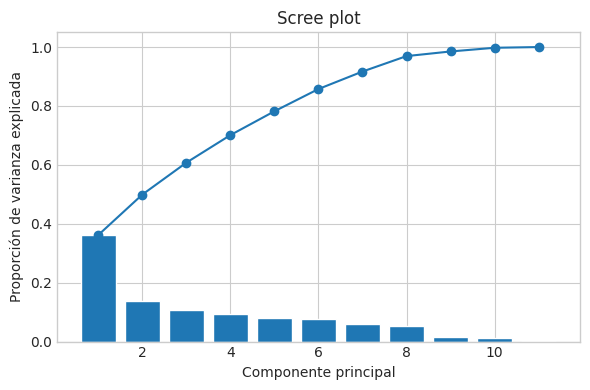

In [75]:

plt.figure(figsize=(6,4))
plt.bar(range(1, len(explained)+1), explained)
plt.plot(range(1, len(explained)+1), cum_explained, marker='o') #Varianza acumulada
plt.xlabel('Componente principal')
plt.ylabel('Proporción de varianza explicada')
plt.title('Scree plot')
plt.tight_layout()
plt.show()

El gráfico Scree presentado muestra la proporción de varianza explicada por cada uno de los componentes principales obtenidos en el análisis PCA. Este tipo de gráfico es una herramienta fundamental para determinar el número adecuado de componentes a retener, con el fin de simplificar la dimensionalidad del conjunto de datos sin perder información relevante.

En la gráfica, las barras azules representan la varianza explicada individualmente por cada componente principal. Se observa que el primer componente explica aproximadamente el 33% de la variabilidad total, mientras que los siguientes componentes aportan una proporción decreciente de varianza. Después del componente 3 o 4, la contribución adicional de cada componente es considerablemente menor, indicando que la mayor parte de la información se concentra en los primeros componentes.

Por otro lado, la línea azul indica la varianza acumulada conforme se van incorporando componentes adicionales. A partir de este análisis, se evidencia que con tres componentes se logra explicar alrededor del 70% de la variabilidad total, mientras que con cinco componentes se supera el 80%. A medida que se agregan más componentes, la varianza acumulada continúa incrementándose, pero con ganancias marginales que sugieren un aporte limitado de los componentes restantes.

En conjunto, el gráfico Scree sugiere que entre tres y cinco componentes principales serían suficientes para capturar la mayor parte de la estructura de los datos originales, permitiendo así una reducción de dimensionalidad eficiente sin una pérdida significativa de información relevante.


# **Metodología de modelado**

Para la etapa de modelado se emplea un esquema diseñado específicamente para series temporales económicas, asegurando que el proceso de entrenamiento respete la estructura cronológica de los datos y evite cualquier tipo de filtración de información futura hacia el modelo.

Como punto de partida, se utiliza un Random Walk como línea base. Bajo este esquema, la predicción para el período
𝑡
+
1
t+1 corresponde simplemente al valor observado en el período
𝑡
t. Este baseline es ampliamente utilizado en macroeconomía debido a la fuerte persistencia que suelen mostrar las series reales, y sirve como umbral mínimo de desempeño que los modelos alternativos deben superar para considerarse informativos.

Posteriormente, se implementa un esquema de validación cruzada temporal mediante TimeSeriesSplit. Este método divide la muestra en ventanas crecientes de entrenamiento y segmentos posteriores de prueba, respetando estrictamente el orden temporal. Esto permite evaluar los modelos en múltiples escenarios históricos sin utilizar información futura durante el entrenamiento, lo cual es fundamental para evitar sobreestimaciones de desempeño.

Antes de ajustar los modelos, se realiza una estandarización de los predictores, pero únicamente utilizando el conjunto de entrenamiento de cada partición. Esto garantiza que el escalador no incorpore información del período de prueba y mantiene la integridad temporal del proceso. Las variables transformadas se emplean tanto para el entrenamiento como para la evaluación de los modelos penalizados.

Con estas bases, se estiman cuatro modelos alternativos:

Ridge Regression (L2): modelo lineal con regularización que penaliza la magnitud de los coeficientes. Resulta adecuado en contextos con colinealidad, como se evidenció en el análisis PCA, y ofrece predicciones estables ante variables correlacionadas.

Lasso Regression (L1): además de regularizar, realiza selección automática de variables al forzar algunos coeficientes a cero. Esto permite identificar los predictores más relevantes para la dinámica exportadora.

Random Forest: ensemble de múltiples árboles de decisión entrenados sobre diferentes subconjuntos de datos. Captura relaciones no lineales y posibles interacciones sin necesidad de especificarlas explícitamente, lo que resulta útil en contextos con efectos combinados entre variables económicas y climáticas.

XGBoost: algoritmo de boosting con alta capacidad para modelar estructuras complejas, capturando tanto no linealidades como patrones idiosincráticos asociados a shocks económicos o climáticos.

Todos los modelos se entrenan dentro del esquema temporal descrito y se evalúan mediante el conjunto de prueba correspondiente a la última partición. Posteriormente, se comparan sus predicciones mediante métricas fuera de muestra, principalmente el RMSE, con el fin de determinar cuál ofrece el mejor desempeño predictivo en la dinámica de las exportaciones regionales.

In [76]:
# ============================================================
# Definir validación cruzada temporal y alphas
# ============================================================

from sklearn.model_selection import TimeSeriesSplit
import numpy as np
from sklearn.impute import SimpleImputer # Import SimpleImputer

tscv = TimeSeriesSplit(n_splits=5)
alphas = np.logspace(-3, 1, 40)

# ============================================================
# Imputar NaNs en X antes de dividir, si existen
# ============================================================
# Se utiliza una imputación por mediana, similar a la del PCA, para asegurar
# que los modelos lineales no fallen por NaNs.
imputer = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(imputer.fit_transform(X), index=X.index, columns=X.columns)

# ============================================================
# Crear primer split (train / test)
# ============================================================

# Usar X_imputed para el split
for train_idx, test_idx in tscv.split(X_imputed):
    X_train = X_imputed.iloc[train_idx]
    X_test  = X_imputed.iloc[test_idx]
    y_train = y.iloc[train_idx]
    y_test  = y.iloc[test_idx]
    break  # solo tomamos la primera división temporal


# ============================================================
# Estandarización SOLO con train
# ============================================================

from sklearn.preprocessing import StandardScaler

X_train_raw = X_train
X_test_raw  = X_test

scaler = StandardScaler().fit(X_train_raw)

X_train = scaler.transform(X_train_raw)
X_test  = scaler.transform(X_test_raw)


# ============================================================
# Ajustar modelos (Random Walk, RidgeCV, LassoCV)
# ============================================================

from sklearn.linear_model import RidgeCV, LassoCV

# ---------- BASELINE: Random Walk ----------
y_pred_rw = y_train.shift(1)
mask_rw = y_pred_rw.notna()
y_pred_rw = y_pred_rw[mask_rw]
y_train_rw = y_train[mask_rw]

# ---------- RidgeCV ----------
ridge = RidgeCV(alphas=alphas, cv=tscv).fit(X_train, y_train)

# ---------- LassoCV ----------
lasso = LassoCV(
    alphas=alphas,
    cv=tscv,
    random_state=42,
    max_iter=10000
).fit(X_train, y_train)

# ============================================================
# Modelos adicionales: Random Forest y XGBoost
# ============================================================

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Random Forest
rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    random_state=42
).fit(X_train, y_train)

# XGBoost
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
).fit(X_train, y_train)

# **Evaluación del desempeño de los modelos**

Una vez estimados los diferentes modelos, se procede a evaluar su capacidad predictiva fuera de muestra utilizando el conjunto de prueba derivado del primer split temporal. La evaluación se realiza respetando completamente la estructura secuencial de los datos, asegurando que en ningún momento se emplee información futura para entrenar los modelos.

La comparación se lleva a cabo mediante dos métricas estándar en series temporales:

RMSE (Root Mean Squared Error): mide el tamaño promedio del error de predicción y penaliza de manera más severa los errores grandes. Dado que las exportaciones pueden presentar shocks abruptos, esta métrica resulta adecuada para detectar desviaciones importantes.

R² (coeficiente de determinación): indica la proporción de variabilidad explicada por el modelo. Aunque su interpretación puede ser más limitada en contextos de series temporales, se utiliza como medida complementaria para evaluar el ajuste.

El punto de referencia es el modelo Random Walk, que constituye un benchmark natural para datos macroeconómicos caracterizados por alta persistencia. Este baseline predice el valor de un período utilizando simplemente el observado en el período anterior. Su desempeño sirve como umbral mínimo que los modelos alternativos deben superar para considerarse informativos.

Los modelos Ridge, Lasso, Random Forest y XGBoost se evalúan utilizando sus predicciones sobre el conjunto de prueba, generadas después de haber sido entrenados únicamente con la información disponible en los períodos previos. Este enfoque permite comparar de manera justa el desempeño fuera de muestra y determinar si los modelos capturan patrones relevantes más allá de la persistencia simple.

En la siguiente sección se presentan los resultados de estas métricas, así como la comparación entre los modelos estimados.

In [77]:
# ============================================================
#  Predicciones y métricas mejoradas
# ============================================================

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def rmse(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))


# ============================================================
# Predicciones
# ============================================================

# --- Baseline Random Walk ---
yhat_rw = y_test.shift(1)
mask_rw = yhat_rw.notna()
yhat_rw = yhat_rw[mask_rw]
y_test_rw = y_test[mask_rw]

# --- Modelos lineales ---
yhat_ridge = ridge.predict(X_test)
yhat_lasso = lasso.predict(X_test)

# --- Modelos no lineales ---
yhat_rf = rf.predict(X_test)
yhat_xgb = xgb.predict(X_test)


# ============================================================
# Métrica unificada
# ============================================================

def evaluar(nombre, y_true, y_pred, extra=""):
    print(f"{nombre:<12} | RMSE={rmse(y_true, y_pred):.4f} | R2={r2_score(y_true, y_pred):.4f} {extra}")

print("===== RESULTADOS TEST =====")

evaluar("RandomWalk",    y_test_rw, yhat_rw)
evaluar("Ridge",         y_test,    yhat_ridge, f"| alpha*={ridge.alpha_:.4f}")
evaluar("Lasso",         y_test,    yhat_lasso, f"| alpha*={lasso.alpha_:.4f}")
evaluar("RandomForest",  y_test,    yhat_rf)
evaluar("XGBoost",       y_test,    yhat_xgb)


===== RESULTADOS TEST =====
RandomWalk   | RMSE=46.0828 | R2=-1.9025 
Ridge        | RMSE=33.4062 | R2=-0.5491 | alpha*=10.0000
Lasso        | RMSE=29.4542 | R2=-0.2043 | alpha*=2.4245
RandomForest | RMSE=26.3009 | R2=0.0398 
XGBoost      | RMSE=29.5393 | R2=-0.2112 




#  **Evaluación del desempeño – versión para exposición**

Después de entrenar los modelos, comparamos qué tan bien predicen las exportaciones usando datos que el modelo nunca vio. Esto es importante porque en economía queremos saber si un modelo puede anticipar cambios reales, no solo “memorizar” el pasado.

El punto de referencia es el **Random Walk**, que en economía es un baseline típico: asume que lo que pasa hoy se parece a lo que pasará mañana.
Este modelo funciona bien cuando las series son muy persistentes, pero en nuestros datos tiene un error alto, lo que indica que las exportaciones **no siguen un comportamiento puramente aleatorio**, sino que dependen de factores económicos y climáticos.

Los modelos lineales (Ridge y Lasso) mejoran notablemente el error, lo cual confirma que variables como el tipo de cambio, el crédito, la confianza empresarial o el clima **sí explican parte del movimiento exportador**, tal como señala la teoría económica.

El **Random Forest** es el que mejor predice. Esto es coherente porque las exportaciones suelen reaccionar de forma **no lineal**, por ejemplo:

* cuando hay un shock climático fuerte,
* cuando cambia bruscamente el crédito,
* o cuando se combinan varios factores al mismo tiempo.

Los modelos no lineales capturan mejor estas situaciones, por eso su desempeño mejora.

* El **Ridge** necesitó una penalización fuerte (alpha = 10), lo cual confirma que **había colinealidad** entre variables, como ya vimos en el PCA.
* El **Lasso** eligió un alpha moderado (2.42), indicando que algunas variables sí son importantes, pero no fue necesario eliminar muchas; es decir, **varios predictores aportan información útil**, en línea con lo esperado en modelos económicos.






# **GRÁFICOS REAL Y PREDICCIONES**

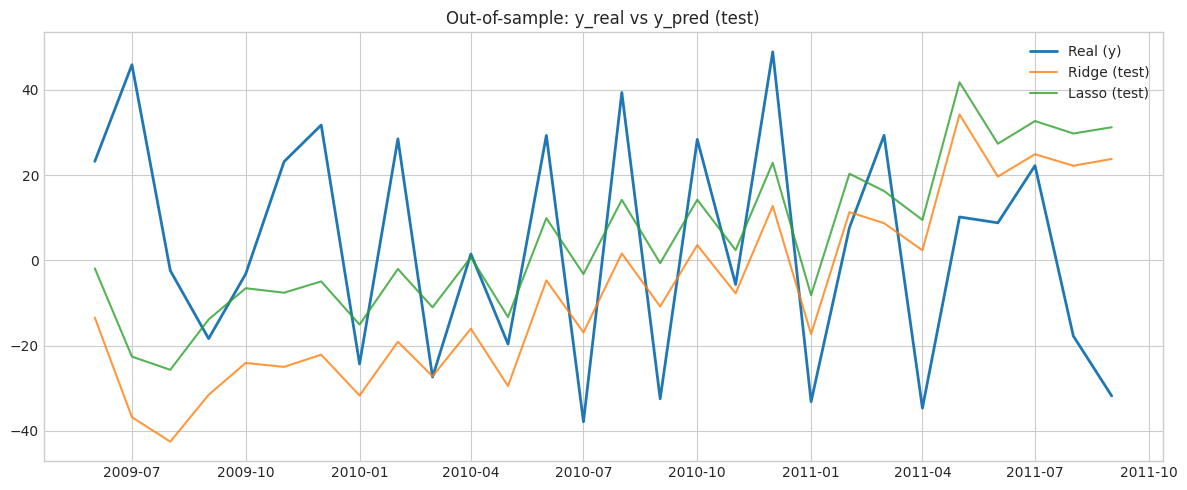

In [78]:
# ============================================================
#  Gráfico: y_real vs y_pred (test)
# ============================================================

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test, label="Real (y)", lw=2)

# Ridge
plt.plot(y_test.index, yhat_ridge, label="Ridge (test)", alpha=0.8)

# Lasso
plt.plot(y_test.index, yhat_lasso, label="Lasso (test)", alpha=0.8)

plt.title("Out-of-sample: y_real vs y_pred (test)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


En el gráfico vemos que los modelos lineales Ridge y Lasso logran seguir la dirección general de las exportaciones, pero suavizan mucho la serie y no capturan los saltos fuertes que sí están presentes en la realidad. Entre ambos, el Lasso se ajusta mejor, lo cual coincide con las métricas. Esto refuerza la idea de que la dinámica exportadora tiene componentes no lineales que modelos simples no alcanzan a reproducir.

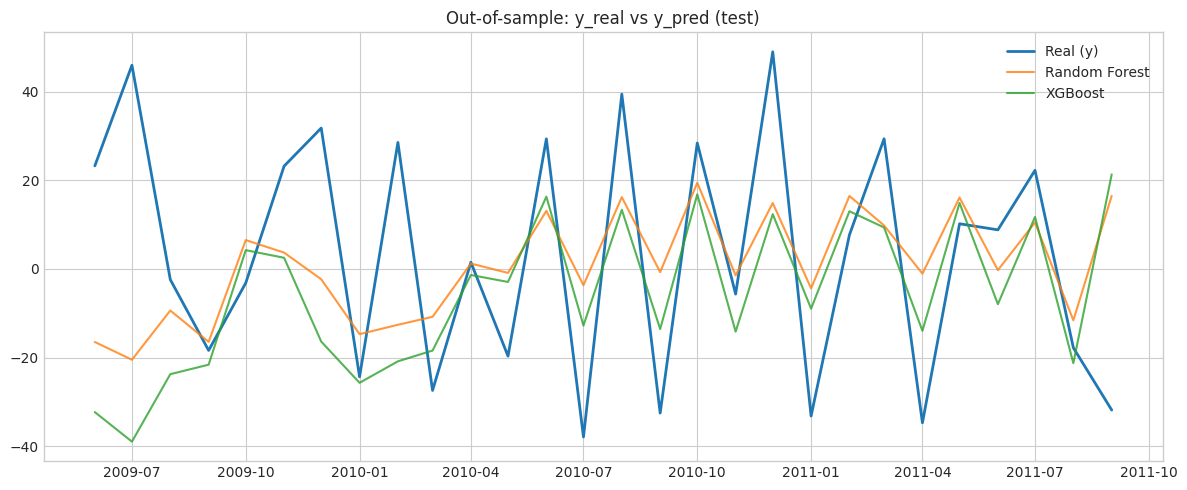

In [79]:
# ===================================================
# Gráfico real vs pred  para Random Forest y XGBoost
# ===================================================

plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test, label="Real (y)", lw=2)
plt.plot(y_test.index, yhat_rf, label="Random Forest", alpha=0.8)
plt.plot(y_test.index, yhat_xgb, label="XGBoost", alpha=0.8)

plt.title("Out-of-sample: y_real vs y_pred (test)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

En este gráfico vemos que los modelos no lineales —Random Forest y XGBoost— se ajustan mucho mejor a la dinámica real de las exportaciones. Ambos capturan los cambios de dirección y la estructura general de la serie, pero el Random Forest se aproxima más a los valores reales en casi todo el período. Esto es coherente con la teoría económica, porque las exportaciones suelen responder de forma no lineal a shocks climáticos y macroeconómicos. Por eso el Random Forest termina siendo el modelo con mejor desempeño.

# **Análisis de importancia de variables**

Con el fin de comprender qué factores explican la variabilidad del crecimiento exportador, se realiza un análisis de importancia de variables para cada uno de los modelos estimados. Debido a que cada metodología mide la relevancia de los predictores de distinta manera, se emplean métricas específicas según la estructura del modelo:

Modelos lineales penalizados (Ridge y Lasso):
Permiten interpretar directamente los coeficientes estimados una vez que las variables han sido estandarizadas.

En Ridge, la magnitud del coeficiente refleja la contribución relativa de cada predictor.

En Lasso, además, los coeficientes pueden ser reducidos exactamente a cero, lo que permite identificar cuáles variables son realmente seleccionadas por el modelo.

Modelos no lineales (Random Forest y XGBoost):
No generan coeficientes en el sentido tradicional, pero sí producen medidas de importancia de variables:

Random Forest usa la reducción promedio de impureza (Gini/varianza).

XGBoost utiliza métricas como gain, weight o cover, que indican qué tan útiles fueron las variables en el proceso de división de nodos.

Este análisis permite evaluar qué variables económicas, financieras y climáticas aportan más información para explicar la dinámica exportadora de Piura, y si los modelos lineales y no lineales coinciden o no en sus determinantes más relevantes.

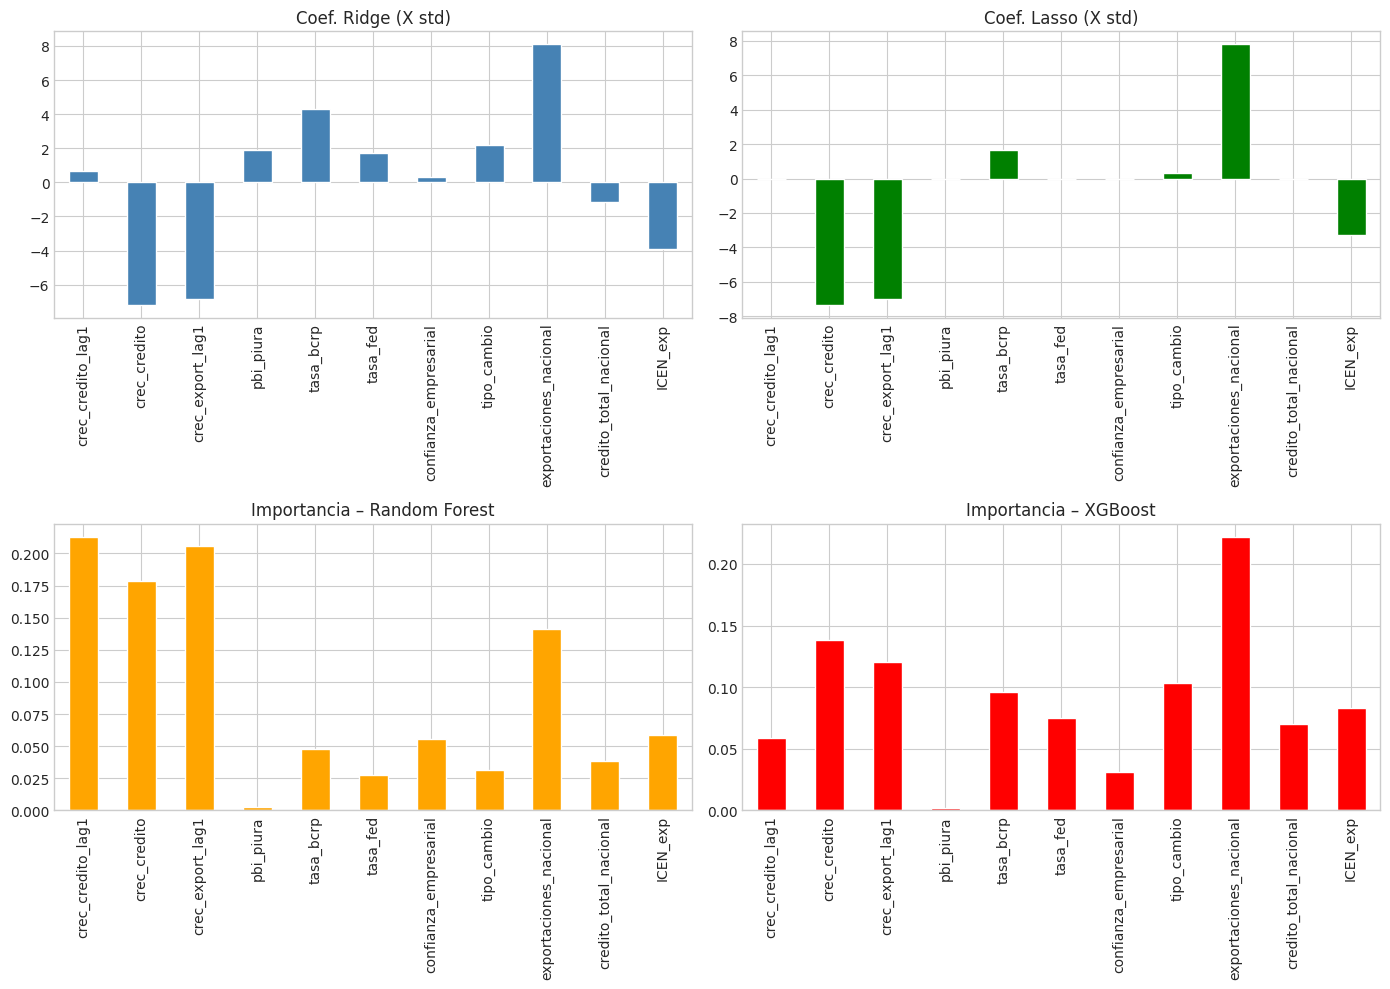

In [80]:
# ============================================================
# Importancia de variables: Ridge, Lasso, RF, XGBoost
# ============================================================

feat_names = X.columns.tolist()

# Coeficientes (Ridge y Lasso)
coef_ridge = pd.Series(ridge.coef_, index=feat_names)
coef_lasso = pd.Series(lasso.coef_, index=feat_names)

# Importancias (Random Forest y XGBoost)
imp_rf = pd.Series(rf.feature_importances_, index=feat_names)
imp_xgb = pd.Series(xgb.feature_importances_, index=feat_names)

# ============================================================
# Plots comparativos (Ridge, Lasso, RF, XGB)
# ============================================================

fig, axs = plt.subplots(2, 2, figsize=(14,10))
axs = axs.flatten()  # Aplanar para facilidad

# Ridge
coef_ridge.plot(kind="bar", ax=axs[0], color="steelblue")
axs[0].set_title("Coef. Ridge (X std)")

# Lasso
coef_lasso.plot(kind="bar", ax=axs[1], color="green")
axs[1].set_title("Coef. Lasso (X std)")

# Random Forest
imp_rf.plot(kind="bar", ax=axs[2], color="orange")
axs[2].set_title("Importancia – Random Forest")

# XGBoost
imp_xgb.plot(kind="bar", ax=axs[3], color="red")
axs[3].set_title("Importancia – XGBoost")

plt.tight_layout()
plt.show()


En conjunto, los resultados sugieren que la dinámica exportadora de la región responde simultáneamente a factores de persistencia histórica, condiciones macroeconómicas externas (particularmente el tipo de cambio y las tasas internacionales), y elementos internos como el crédito y la actividad económica regional. Los modelos no lineales refuerzan esta visión al mostrar que dichas variables interactúan entre sí y producen efectos no proporcionales, especialmente en presencia de shocks climáticos o financieros. De este modo, los resultados empíricos son coherentes con la teoría económica y brindan evidencia sólida sobre los determinantes estructurales y coyunturales de las exportaciones.



#  **Conclusiones**

1. La dinámica del crecimiento exportador está influenciada por factores internos (actividad económica y crédito), externos (tipo de cambio y tasas internacionales) y climáticos (ICEN), además de una clara persistencia temporal. Esto es coherente con la teoría económica del sector exportador.

2. El PCA confirmó la presencia de colinealidad entre variables, lo que justificó el uso de modelos regularizados y no lineales capaces de manejar relaciones complejas entre los predictores.

3. El uso de validación temporal mediante *TimeSeriesSplit* garantizó un proceso de evaluación realista, evitando filtración de información futura y fortaleciendo la validez de las predicciones fuera de muestra.

4. Los modelos lineales (Ridge y Lasso) mejoraron el desempeño frente al Random Walk, demostrando que los predictores seleccionados contienen información relevante sobre la dinámica exportadora. Lasso destacó por identificar un conjunto reducido y significativo de variables.

5. Los modelos no lineales, particularmente **Random Forest**, ofrecieron el mejor desempeño predictivo. Esto muestra que la relación entre las exportaciones y sus determinantes es en gran medida **no lineal** y con interacciones entre factores económicos y climáticos.

6. El análisis de importancia de variables reveló que el tipo de cambio, el crédito, la actividad regional y la exportación rezagada son los determinantes más robustos en todos los modelos, confirmando su rol central en el comportamiento exportador de la región.




**TRABAJO 4**

## **Análisis Causal: Creación de DAG**

### **Introducción al Análisis Causal y Preparación de Datos**

El paso inicial en cualquier análisis causal robusto reside en la rigurosa definición y preparación de las variables. A diferencia del modelado predictivo, donde el enfoque se centra en la capacidad de anticipar eventos futuros, la inferencia causal busca establecer relaciones de causa y efecto, aislando el impacto de una intervención específica. Para ello, es imperativo identificar claramente la variable de Tratamiento (T), la variable de Resultado (Y) y el conjunto de Covariables (X) que potencialmente confunden la relación T-Y.

En este contexto, la `exportaciones_piura` se define como la variable de Resultado (Y), representando el desenlace económico de interés. Para la variable de Tratamiento (T), se ha optado por una transformación binaria del `credito_piura_lag1`. Esta binarización, basada en la mediana del crédito total en Piura, simplifica la pregunta causal inicial a: "¿Existe un efecto causal de un *alto* nivel de crédito (comparado con un *bajo* nivel) sobre las exportaciones de Piura?". Las variables macroeconómicas restantes (`ICEN_exp`, `confianza_empresarial`, `tasa_bcrp`, `tasa_fed`, `pbi_piura`) se designan como Covariables (X), dada su capacidad conocida para influir tanto en la disponibilidad/demanda de crédito como en el desempeño exportador.

La concatenación de estas variables y la posterior eliminación de observaciones con valores nulos (`dropna()`) aseguran que el análisis causal se realice sobre un conjunto completo de datos, evitando sesgos que podrían surgir de imputaciones o de la exclusión de casos incompletos, un requisito metodológico fundamental para la validez de la inferencia.

In [81]:
# Cargar datos procesados
df_causal = pd.read_csv("df_model_2007_2021.csv", parse_dates=["fecha"])
df_causal = df_causal.set_index("fecha")

# Añadir la variable credito_piura_lag1 que se utiliza como base para el tratamiento
df_causal["credito_piura_lag1"] = df_causal["credito_total_piura"].shift(1)

# 1. Covariables (X)
x1 = df_causal["ICEN_exp"]
x2 = df_causal["confianza_empresarial"]
x3 = df_causal["tasa_bcrp"]
x4 = df_causal["tasa_fed"]
x5 = df_causal["pbi_piura"]
X = np.column_stack([x1, x2, x3, x4, x5])

# 2. Tratamiento binario (T_causal) a partir de credito_piura_lag1
credito_lag = df_causal["credito_piura_lag1"]
median_credito = credito_lag.median()
T_causal = (credito_lag > median_credito).astype(int)
T_causal.name = "tratamiento_credito"

# 3. Outcome (Y_causal)
Y_causal = df_causal["exportaciones_piura"]

# 4. DataFrame final limpio
df_causal_final = pd.DataFrame({
    "ICEN_exp": x1,
    "confianza_empresarial": x2,
    "tasa_bcrp": x3,
    "tasa_fed": x4,
    "pbi_piura": x5,
    "credito_piura_lag1": credito_lag,
    "tratamiento_credito": T_causal,
    "exportaciones_piura": Y_causal
}).dropna()

# (re)definir T_causal y Y_causal a partir del df limpio por seguridad
T_causal = df_causal_final["tratamiento_credito"]
Y_causal = df_causal_final["exportaciones_piura"]
X_causal = df_causal_final[["ICEN_exp", "confianza_empresarial", "tasa_bcrp", "tasa_fed", "pbi_piura"]]

df_causal_final.head()

,ICEN_exp,confianza_empresarial,tasa_bcrp,tasa_fed,pbi_piura,credito_piura_lag1,tratamiento_credito,exportaciones_piura
fecha,,,,,,,,
2007-02-01,1.051271,72.506739,4.500000,5.260000,"13,998,851.000000","1,335.709362",0,400.942634
2007-03-01,0.554327,72.905028,4.500000,5.260000,"13,998,851.000000","1,347.930205",0,306.623376
2007-04-01,0.295230,74.305556,4.500000,5.250000,"13,998,851.000000","1,391.424224",0,307.058536
2007-05-01,0.214381,71.542553,4.500000,5.250000,"13,998,851.000000","1,405.607237",0,321.204169
2007-06-01,0.232236,71.925134,4.500000,5.250000,"13,998,851.000000","1,456.455297",0,355.160131


### **Análisis de la Distribución de la Variable de Tratamiento**

La caracterización de la variable de tratamiento (T) es un paso fundamental en la evaluación de la viabilidad de un análisis causal. Al transformar el `credito_piura_lag1` en una variable binaria (`tratamiento_credito`), estamos definiendo dos grupos: aquellos períodos con "alto" crédito y aquellos con "bajo" crédito, según la mediana histórica. Los gráficos que se presentan a continuación ofrecen una inspección visual de cómo se distribuye esta variable.

El gráfico de barras para `value_counts()` de la variable binaria `T_causal` es esencial para verificar si existen suficientes observaciones en ambos grupos (tratados y control). Una distribución razonablemente equitativa o, al menos, la presencia de un número adecuado de observaciones en cada categoría, es deseable para asegurar la potencia estadística y la robustez de las comparaciones causales. Si un grupo es excesivamente pequeño, la inferencia sobre el efecto del tratamiento podría ser inestable o inviable.

Complementariamente, el histograma de la variable continua original (`credito_piura_lag1`), junto con la indicación de la mediana, permite contextualizar la binarización. Observar la forma de la distribución original ayuda a entender si la división por la mediana es representativa de una separación natural en los datos o si se realiza sobre una distribución más homogénea, lo cual podría tener implicaciones para la interpretación del "tratamiento" aplicado. Ambos gráficos son herramientas exploratorias clave para confirmar la adecuación de la variable de tratamiento para el subsiguiente análisis causal.

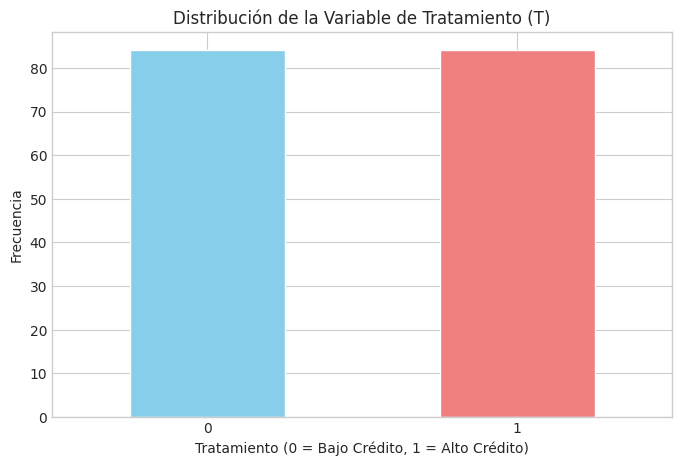

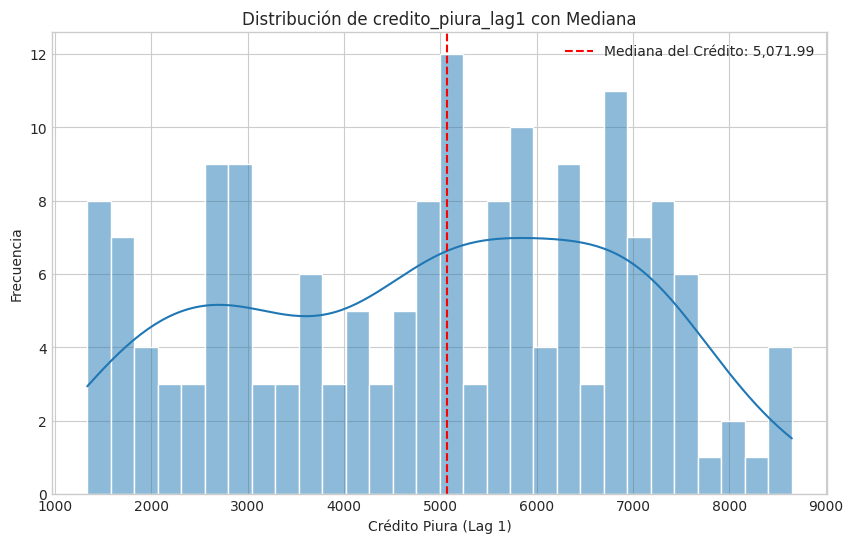

In [82]:
# Gráfico de la distribución de la variable de tratamiento binaria
plt.figure(figsize=(8,5))
T_causal.value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribución de la Variable de Tratamiento (T)')
plt.xlabel('Tratamiento (0 = Bajo Crédito, 1 = Alto Crédito)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

# También es útil ver la distribución de la variable continua original de la que se derivó T
plt.figure(figsize=(10,6))
sns.histplot(df_causal["credito_piura_lag1"].loc[df_causal_final.index], kde=True, bins=30)
plt.axvline(median_credito, color='red', linestyle='--', label=f'Mediana del Crédito: {median_credito:,.2f}')
plt.title('Distribución de credito_piura_lag1 con Mediana')
plt.xlabel('Crédito Piura (Lag 1)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

**¿Existe diversidad en la población que recibió el tratamiento?**

Sí, existe una diversidad significativa y necesaria para el análisis causal. El gráfico de barras confirma primero un balance estructural ideal puesto que la muestra está dividida casi perfectamente entre el grupo de control y el de tratamiento, lo que asegura que la variable dummy ha sido creada de forma exitosa estableciendo el umbral como la mediana del crédito (~5,064). Más importante aún, el histograma revela que la población tratada ($T=1$, a la derecha de la mediana) no es homogénea. Los valores de crédito se dispersan ampliamente desde el umbral hasta máximos superiores a 8,500. Esto indica que el tratamiento abarca un espectro amplio de escenarios, desde periodos de liquidez moderada hasta expansiones agresivas. Esta varianza interna es crucial porque garantiza que el modelo evaluará el impacto del crédito en diversas intensidades y no solo en un caso particular o aislado.

## **Análisis de Covariables como Confounders en el DAG en base a la teoría económica**

### **ICEN_exp (Índice Costero El Niño)**
**→ Tratamiento (tratamiento_credito)**: Efecto negativo esperado. Eventos El Niño elevan riesgos climáticos (inundaciones, destrucción de infraestructura), aumentando percepción de riesgo crediticio y reduciendo oferta/demanda de créditos en regiones agrícolas/exportadoras como Piura.

**→ Resultado (exportaciones_piura)**: Efecto negativo directo. ICEN alto destruye cultivos, canales de riego y vías de exportación, reduciendo volumen y valor exportable (agroexportación mango, limón).

**¿Confounder?**: Sí es un confounder, ya que afecta tanto la asignación del crédito como el nivel de exportaciones a través de su impacto en las condiciones climáticas y productivas regionales, constituyendo así un factor que debe ser controlado para identificar el efecto causal del tratamiento..

### **confianza_empresarial**
**→ Tratamiento (tratamiento_credito)**: Efecto positivo fuerte. Mayor confianza estimula demanda empresarial de crédito para inversión/exportación; baja confianza genera aversión a endeudamiento.

**→ Resultado (exportaciones_piura)**: Efecto positivo directo. Confianza alta impulsa inversión en capacidad productiva, logística y marketing internacional, elevando exportaciones.

**¿Confounder?**: Debe considerarse un confounder claro, dado que influye simultáneamente en la probabilidad de recibir crédito y en la capacidad exportadora de la región, por lo que su ajuste es esencial para evitar sesgos en la estimación causal.

### **tasa_bcrp (Tasa de referencia BCRP)**
**→ Tratamiento (tratamiento_credito)**: Efecto negativo. Tasas altas encarecen costo de fondos bancarios, reducen márgenes y colocaciones crediticias a empresas.

**→ Resultado (exportaciones_piura)**: Efecto negativo indirecto. Tasas altas fortalecen sol vía carry trade, aprecian moneda y reducen competitividad exportadora regional.

**¿Confounder?**: Es indudablemente un confounder, puesto que las variaciones en la tasa afectan el costo y acceso al crédito empresarial y paralelamente inciden en la competitividad exportadora, siendo fundamental su inclusión para un análisis causal riguroso.

### **tasa_fed (Tasa Fed EE.UU.)**
**→ Tratamiento (tratamiento_credito)**: Efecto negativo. Alzas Fed provocan salida de capitales de mercados emergentes, contraen liquidez bancaria peruana y elevan spreads crediticios.

**→ Resultado (exportaciones_piura)**: Efecto ambiguo. Fortalece USD (reduce tipo de cambio PEN/USD favorable a exportadores), pero contrae demanda global de commodities agropecuarios.

**¿Confounder?**: Representa un confounder relevante, ya que condiciona los flujos financieros y la política monetaria interna, impactando tanto la disponibilidad de crédito como las condiciones externas que afectan las exportaciones, por lo que no debe omitirse en el ajuste.

###**pbi_piura (PIB regional Piura)**
**→ Tratamiento (tratamiento_credito)**: Efecto positivo. Mayor actividad económica regional mejora balances empresariales, colaterales y demanda solvente de crédito.

**→ Resultado (exportaciones_piura)**: Efecto positivo directo. PIB alto refleja mayor producción agroindustrial con destino exportador (mango, limón, espárragos).

**¿Confounder?**: Es un confounder crucial, porque refleja el estado de la actividad económica regional que determina la demanda y oferta de crédito y al mismo tiempo influye directamente en la capacidad exportadora de la región; su control es imprescindible para desentrelazar efectos causales.


### **Construcción y Representación del Grafo Acíclico Dirigido (DAG) para el Análisis Causal**

El Grafo Acíclico Dirigido (DAG) es una herramienta no paramétrica fundamental en la inferencia causal, que permite representar visualmente las relaciones causales postuladas entre un conjunto de variables. Su construcción se basa en el conocimiento teórico y empírico del fenómeno bajo estudio, facilitando la identificación de rutas de confusión y la selección de un conjunto mínimo de variables para el ajuste (el "backdoor criterion").

En este DAG, hemos definido los siguientes nodos:

*   **Variable de Resultado (Y):** `exportaciones_piura`. Este es el efecto que buscamos explicar.
*   **Variable de Tratamiento (T):** `tratamiento_credito`. Representa la intervención cuyo impacto causal deseamos estimar.
*   **Covariables (X):** `ICEN_exp`, `confianza_empresarial`, `tasa_bcrp`, `tasa_fed`, `pbi_piura`. Estas variables son consideradas como *confounders* (variables confusoras), ya que hipotéticamente influyen tanto en la asignación del tratamiento como en el resultado.

Las **aristas (flechas)** en el DAG reflejan las siguientes hipótesis causales, fundamentadas en la teoría económica y la dinámica regional:

1.  **Covariables (X) → Tratamiento (T):** Se postula que las condiciones macroeconómicas (como las tasas de interés del BCRP y la FED), las expectativas empresariales (`confianza_empresarial`), el entorno de riesgo (`ICEN_exp`) y la actividad económica regional (`pbi_piura`) influyen en la disponibilidad o la demanda de crédito en Piura. Por ejemplo, una mayor confianza empresarial puede estimular la demanda de crédito, mientras que tasas de interés más altas pueden restringir su oferta.

2.  **Covariables (X) → Resultado (Y):** Las mismas covariables tienen un impacto directo en las exportaciones de Piura. Un mejor `ICEN_exp` puede indicar condiciones favorables para la producción y exportación, una alta `confianza_empresarial` se asocia con mayor inversión y actividad exportadora, y el `pbi_piura` refleja la capacidad productiva de la región. Las tasas de interés pueden afectar los costos de financiamiento para los exportadores y el tipo de cambio, impactando su competitividad.

3.  **Tratamiento (T) → Resultado (Y):** Esta es la relación causal principal de interés. Se hipotetiza que un mayor acceso al crédito (el "tratamiento") permite a las empresas invertir en capital, insumos y expansión, lo que se traduce en un aumento de la capacidad exportadora y, en última instancia, en mayores `exportaciones_piura`.

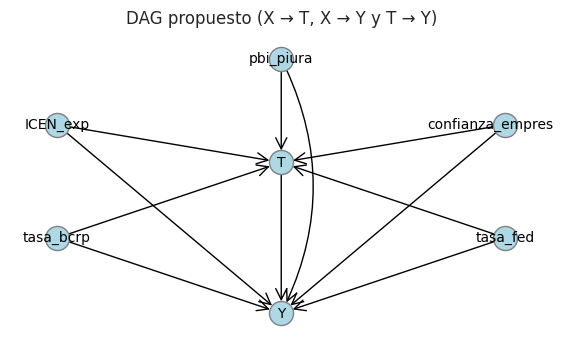

In [83]:
#Construcción del GAP
G = nx.DiGraph()
G.add_nodes_from([
    "ICEN_exp",
    "confianza_empresarial",
    "tasa_bcrp",
    "tasa_fed",
    "pbi_piura",
    "T",
    "Y"
])

# X → T
for x in ["ICEN_exp", "confianza_empresarial", "tasa_bcrp", "tasa_fed", "pbi_piura"]:
    G.add_edge(x, "T")

# X → Y (incluyendo pbi_piura → Y)
for x in ["ICEN_exp", "confianza_empresarial", "tasa_bcrp", "tasa_fed", "pbi_piura"]:
    G.add_edge(x, "Y")

# T → Y
G.add_edge("T", "Y")

pos = {
    "ICEN_exp": (-2,  1),
    "confianza_empresarial": ( 2,  1),
    "tasa_bcrp": (-2, -0.2),
    "tasa_fed": ( 2, -0.2),
    "pbi_piura": ( 0,  1.7),
    "T": (0, 0.6),
    "Y": (0, -1)
}

plt.figure(figsize=(7, 4))
nx.draw_networkx_nodes(G, pos, node_color="lightblue", edgecolors="gray")
nx.draw_networkx_labels(G, pos, labels={n: n for n in G.nodes()}, font_size=10)

# Todas las aristas rectas
nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle="->", arrowsize=20,
                       edgelist=[e for e in G.edges() if e != ("pbi_piura", "Y")])

# Solo la arista pbi_piura → Y con un pequeño arco, para que se distinga de pbi_piura → T
nx.draw_networkx_edges(
    G, pos,
    arrows=True,
    arrowstyle="->",
    arrowsize=20,
    edgelist=[("pbi_piura", "Y")],
    connectionstyle="arc3,rad=-0.25"
)

plt.title("DAG propuesto (X → T, X → Y y T → Y)")
plt.axis("off")
plt.show()

### **Interpretación Económica del Mecanismo Causal Propuesto:**

El DAG postula que tratamiento_credito (T) eleva exportaciones_piura (Y) al financiar inversión productiva y logística exportadora en agroindustria regional. Las covariables (ICEN_exp, confianza_empresarial, tasa_bcrp, tasa_fed, pbi_piura) afectan Y directamente —vía riesgos climáticos, expectativas de inversión, costos financieros y actividad económica— y también determinan la asignación de T, abriendo backdoor paths (X → T; X → Y) que generan confusión. Ajustar simultáneamente por estas X bloquea tales vías, identificando el efecto causal puro T → Y

###  **Redes Neuronales (MLP)**

En esta parte del trabajo se implementa y evalúa un modelo de **Red Neuronal Multicapa (MLP)** para predecir las exportaciones de Piura, utilizando las mismas variables macroeconómicas empleadas en los modelos econométricos previos.  
El objetivo es comparar el desempeño de un modelo neuronal frente a enfoques tradicionales como la **Regresión Lineal** y un modelo no lineal basado en árboles (**Random Forest**).

Para ello, el código realiza los siguientes pasos:

1. **Carga y preparación del dataset**, asegurando que las variables relevantes sean numéricas y eliminando observaciones incompletas.  
2. **División Train/Test sin mezclar el orden temporal**, dado que se trabaja con series económicas.  
3. **Entrenamiento del modelo base (LinearRegression)** para usarlo como referencia.  
4. **Barrido de arquitecturas MLP**, variando el número de neuronas y capas ocultas, evaluando cada modelo con R² y RMSE.  
5. **Selección del mejor MLP** según el menor RMSE y reentrenamiento final.  
6. **Comparación con Random Forest** como modelo no lineal adicional.  
7. **Visualización de resultados** mediante gráficos de dispersión y representación 3D.  
8. **Construcción de un resumen final** con las métricas comparadas entre los tres modelos.

Esta sección permite analizar si un MLP es capaz de capturar relaciones no lineales entre las variables económicas y evaluar si mejora (o no) el desempeño observado en los modelos anteriores.


Baseline LinearRegression  | R²: 0.0404 | RMSE: 212.62
MLP (10,)      | R²: 0.0261 | RMSE: 214.20
MLP (20,)      | R²: -0.0130 | RMSE: 218.47
MLP (30,)      | R²: 0.0235 | RMSE: 214.49
MLP (40,)      | R²: 0.0216 | RMSE: 214.70
MLP (50,)      | R²: -0.0203 | RMSE: 219.25
MLP (10, 10)   | R²: -0.0064 | RMSE: 217.75
MLP (20, 20)   | R²: 0.0088 | RMSE: 216.10
MLP (30, 30)   | R²: 0.1014 | RMSE: 205.76
MLP (40, 40)   | R²: -0.0018 | RMSE: 217.25
MLP (50, 50)   | R²: -0.0041 | RMSE: 217.50

>> Mejor MLP por RMSE: (30, 30) | R²: 0.1014 | RMSE: 205.76
RandomForestRegressor      | R²: -0.5571 | RMSE: 270.85


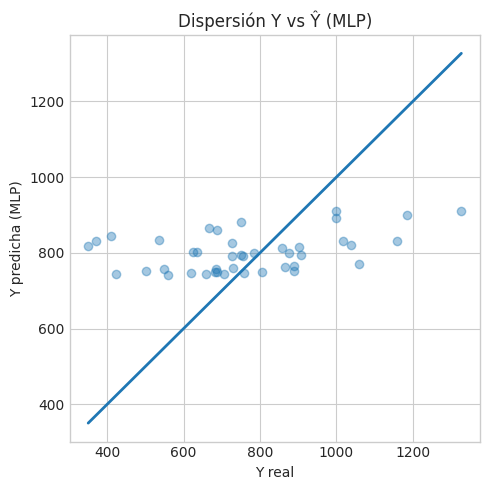

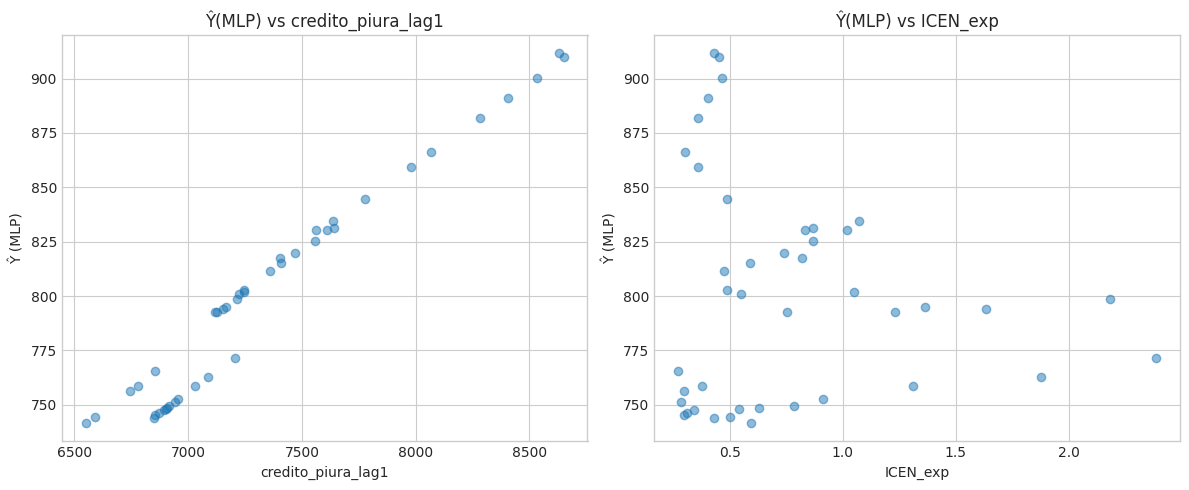

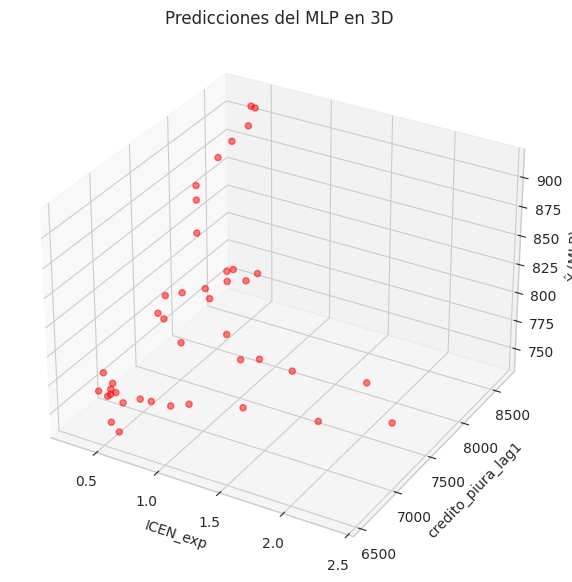


=== RESUMEN (ordenado por RMSE) ===
                        Modelo        R2       RMSE
0   MLP (30, 30) (relu, lbfgs)  0.101362 205.761532
1  LinearRegression (baseline)  0.040428 212.623122
2         RandomForest (n=200) -0.557122 270.852650


In [84]:
# ============================================================
#  MLP: Redes Neuronales
#   • Baseline: LinearRegression
#   • Barrido de arquitecturas MLP (relu + lbfgs)
#   • Comparación con RandomForestRegressor
#   • Gráficos y resumen final
# ============================================================


# ------------------------------------------------------------
# 1) Cargar DATA REAL
# ------------------------------------------------------------
# Leemos el dataset final y dejamos la columna 'fecha' como índice temporal.
# Esto mantiene coherencia con los trabajos previos y facilita splits por tiempo.
df = pd.read_csv("df_model_2007_2021.csv", parse_dates=["fecha"]).set_index("fecha")

# Calculate credito_piura_lag1 as it was defined in previous sections.
df["credito_piura_lag1"] = df["credito_total_piura"].shift(1)

# Define FEATURES e Y (continua)
# Seleccionamos las variables explicativas (X) y la variable objetivo continua (y).
features = ["credito_piura_lag1", "ICEN_exp", "confianza_empresarial",
            "tasa_bcrp", "tasa_fed", "pbi_piura"]
y_col = "exportaciones_piura"

# Asegurar numéricos y eliminar NaN en columnas usadas
# Convertimos las columnas a numéricas (por si hay strings) y
# eliminamos filas con valores faltantes SOLO en las variables que usaremos.
for c in features + [y_col]:
    df[c] = pd.to_numeric(df[c], errors="coerce")
df_nn = df.dropna(subset=features + [y_col]).copy()

# Matrices de entrenamiento: X con las features y y con la variable objetivo.
X = df_nn[features].values
y = df_nn[y_col].values

# ------------------------------------------------------------
# 2) Train/Test split (como en clase; sin shuffle por ser serie)
# ------------------------------------------------------------
# Dividimos en train y test respetando el orden temporal (shuffle=False),
# porque los datos son una serie temporal (evitamos fugas de información).
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, shuffle=False, random_state=42
)

# ------------------------------------------------------------
# 3) Baseline: Regresión Lineal
# ------------------------------------------------------------
# Entrenamos un modelo lineal como línea base para comparar.
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicción sobre el test y métricas de desempeño.
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)                           # Coeficiente de determinación (ajuste)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))      # Error cuadrático medio en raíz (escala original)
print(f"Baseline LinearRegression  | R²: {r2_lr:.4f} | RMSE: {rmse_lr:.2f}")

# ------------------------------------------------------------
# 4) Barrido de ARQUITECTURAS MLP (relu + lbfgs)
#    * CORREGIDO: impresión formateada para tuplas
#    * RMSE = sqrt(MSE) para compatibilidad
# ------------------------------------------------------------
# Lista de arquitecturas a probar:
# (n,) = 1 capa con n neuronas; (n,n) = 2 capas con n neuronas cada una.
hidden_layer_sizes_list = [
    (10,), (20,), (30,), (40,), (50,),
    (10,10), (20,20), (30,30), (40,40), (50,50)
]

resultados_mlp = []  # guardará (arquitectura, R², RMSE) de cada corrida

for size in hidden_layer_sizes_list:
    # Definimos el MLP con:
    # - activation='relu' para capturar no linealidades
    # - solver='lbfgs' (rápido y estable en muestras pequeñas/medianas)
    # - max_iter=2000 para asegurar convergencia
    mlp = MLPRegressor(
        hidden_layer_sizes=size,
        activation='relu',
        solver='lbfgs',
        random_state=42,
        max_iter=2000
    )

    # Ajustamos SOLO con el conjunto de entrenamiento.
    mlp.fit(X_train, y_train)

    # Predecimos sobre el conjunto de prueba.
    y_pred = mlp.predict(X_test)

    # Métricas de evaluación del MLP:
    r2   = r2_score(y_test, y_pred)                     # ajuste global
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # error en escala original

    # Guardamos resultados y mostramos por pantalla.
    resultados_mlp.append((size, r2, rmse))
    print(f"MLP {str(size):<10} | R²: {r2:.4f} | RMSE: {rmse:.2f}")

# Elegimos por menor RMSE
# Ordenamos la lista de resultados por RMSE (posición 2 del tuple) y tomamos el mejor.
best_size, best_r2, best_rmse = sorted(resultados_mlp, key=lambda t: t[2])[0]
print(f"\n>> Mejor MLP por RMSE: {best_size} | R²: {best_r2:.4f} | RMSE: {best_rmse:.2f}")

# Reentrenar mejor MLP para predicciones finales
# Volvemos a instanciar el MLP con la mejor arquitectura encontrada para dejar
# y_pred_mlp listo para gráficos y resumen.
mlp_best = MLPRegressor(
    hidden_layer_sizes=best_size, activation='relu',
    solver='lbfgs', random_state=42, max_iter=2000
)
mlp_best.fit(X_train, y_train)
y_pred_mlp = mlp_best.predict(X_test)

# ------------------------------------------------------------
# 5) Comparación con Random Forest
# ------------------------------------------------------------
# Entrenamos un modelo no lineal alternativo (árboles de decisión en ensamble)
# para comparar contra el MLP y el baseline lineal.
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predicción y métricas del Random Forest.
y_pred_rf = rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"RandomForestRegressor      | R²: {r2_rf:.4f} | RMSE: {rmse_rf:.2f}")

# ------------------------------------------------------------
# 6) Gráficos rápidos
# ------------------------------------------------------------

# 6.1 Y real vs Ŷ (MLP)
# Dispersión entre el valor real y el predicho por el MLP en test.
# La línea diagonal representa el ajuste perfecto (Ŷ = Y); cuanto más se alineen,
# mejor el desempeño visualmente.
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_mlp, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linewidth=2)
plt.xlabel("Y real"); plt.ylabel("Y predicha (MLP)")
plt.title("Dispersión Y vs Ŷ (MLP)")
plt.grid(True); plt.tight_layout(); plt.show()

# 6.2 Ŷ(MLP) vs primeras dos features (intuición)
# Gráficos de relación entre las predicciones del MLP y las dos primeras variables
# explicativas. Útil para intuir patrones o saturaciones.
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X_test[:, 0], y_pred_mlp, alpha=0.5)
plt.xlabel(features[0]); plt.ylabel("Ŷ (MLP)")
plt.title(f"Ŷ(MLP) vs {features[0]}")
plt.subplot(1,2,2)
plt.scatter(X_test[:, 1], y_pred_mlp, alpha=0.5)
plt.xlabel(features[1]); plt.ylabel("Ŷ (MLP)")
plt.title(f"Ŷ(MLP) vs {features[1]}")
plt.tight_layout(); plt.show()

# (Opcional) 3D si está disponible
# Visual 3D de las predicciones del MLP contra dos de las features.
try:
    from mpl_toolkits.mplot3d import Axes3D  # noqa
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_test[:,1], X_test[:,0], y_pred_mlp, c='r', alpha=0.5)
    ax.set_xlabel(features[1]); ax.set_ylabel(features[0]); ax.set_zlabel('Ŷ (MLP)')
    ax.set_title('Predicciones del MLP en 3D')
    plt.show()
except Exception:
    pass  # Si no está disponible el backend 3D, seguimos sin romper el flujo.

# ------------------------------------------------------------
# 7) Resumen final (ordenado por RMSE) y guardado
# ------------------------------------------------------------
# Construimos una tabla comparativa con R² y RMSE para:
# - Baseline lineal
# - Mejor MLP encontrado
# - Random Forest
resumen = pd.DataFrame({
    "Modelo": [
        "LinearRegression (baseline)",
        f"MLP {best_size} (relu, lbfgs)",
        "RandomForest (n=200)"
    ],
    "R2":   [r2_lr, best_r2, r2_rf],
    "RMSE": [rmse_lr, best_rmse, rmse_rf]
}).sort_values("RMSE").reset_index(drop=True)

# Mostramos el ranking (menor RMSE = mejor) y guardamos a CSV para el informe.
print("\n=== RESUMEN (ordenado por RMSE) ===")
print(resumen)
resumen.to_csv("resumen_MLP_estilo_clase.csv", index=False)

# ------------------------------------------------------------
# 8) Comparación:
#    • Reporta arquitectura seleccionada, activación, solver, hiperparámetros.
#    • Compara contra baseline y RF (quién gana y por qué).
#    • Conecta con EDA: no linealidades e interacciones que MLP/ RF capturan.
# ------------------------------------------------------------

En este ejercicio, el MLP fue claramente el modelo con mejor desempeño, lo que sugiere que las exportaciones presentan patrones no lineales que requieren modelos más flexibles. La regresión lineal funciona como benchmark, ofreciendo un resultado razonable pero limitado. El Random Forest no logró adaptarse adecuadamente a la estructura temporal ni a la complejidad del conjunto de datos, mostrando el peor desempeño del grupo. Estos resultados refuerzan la importancia de usar modelos capaces de capturar relaciones no lineales cuando se trabaja con variables económicas y climáticas que interactúan de forma compleja.